귀납적 분석방법 : 나무를 먼저보고 숲을 봄 (데이터사이언스 입장)

# **1. 모듈 import**

In [53]:
import pandas as pd
import numpy as np

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.ticker as ticker

# 한글 폰트 경로를 지정합니다. 원하는 폰트 파일(.ttf 등)의 경로를 입력해주세요.
font_fname = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
# 폰트 패밀리 이름을 가져옵니다.
font_family = font_manager.FontProperties(fname=font_fname).get_name()
# 폰트 패밀리를 설정합니다.
plt.rcParams["font.family"] = font_family
plt.rcParams["axes.unicode_minus"] = False


# 피처셀렉션
from sklearn.feature_selection import SelectKBest, f_regression, chi2
# SelectKBest : 주어진 피처 중에서 가장 중요한 K개의 피처를 선택하는 데 사용되는 변환기(transformer)

## < SelectKBest의 score_func= 매개변수 >
# f_regression : 선형 회귀 모델을 기반으로 피처와 "연속형 타겟 변수" 간의 선형 관계를 평가
# chi2 (카이제곱 검정) : 각 피처와 "범주형 타겟 변수" 간의 의존성을 측정하여 중요한 피처를 선택

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split,  cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error


# 모델
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings("ignore")

# **2. 데이터 불러오기**

In [54]:
# 기존 데이터에서 전처리 완료된 data

org_house = pd.read_csv('reg_data.csv')

# 원본 copy 
house = org_house.copy()

print('after one hot 데이터의 shape :', house.shape)
house.head(1)

after one hot 데이터의 shape : (2335, 135)


,아파트명,법정동주소,위도,경도,세대수,임대세대수,최고층,최저층,최대공급면적,최소공급면적,총아파트동수,용적률,건폐율,세대평균_주차대수,공급면적,전용면적,전용율,방수,욕실수,현관구조,공급액,대형건설사,지하철역,지하철역_거리,역사명,병원_1차,병원_2차,병원_3차,공원,대학,소매,음식,교육,장례식장,보건의료,유원지오락,총인구수,노선_진접선,노선_8호선,노선_경강선,노선_경춘선,노선_신분당선,노선_3호선,노선_수인선,노선_경의중앙선,노선_우이신설선,노선_분당선,노선_김포골드라인,노선_인천_1호선,노선_의정부선,노선_에버라인,노선_인천_2호선,노선_신림선,노선_6호선,노선_2호선,노선_1호선,노선_서해선,노선_9호선,노선_4호선,노선_5호선,노선_인천국제공항선,노선_7호선,타입,광역_경기,광역_서울,광역_인천,기초_경기_가평군,기초_경기_고양시,기초_경기_과천시,기초_경기_광명시,기초_경기_광주시,기초_경기_구리시,기초_경기_군포시,기초_경기_김포시,기초_경기_남양주시,기초_경기_동두천시,기초_경기_부천시,기초_경기_성남시,기초_경기_수원시,기초_경기_시흥시,기초_경기_안산시,기초_경기_안성시,기초_경기_안양시,기초_경기_양주시,기초_경기_양평군,기초_경기_여주시,기초_경기_연천군,기초_경기_오산시,기초_경기_용인시,기초_경기_의왕시,기초_경기_의정부시,기초_경기_이천시,기초_경기_파주시,기초_경기_평택시,기초_경기_포천시,기초_경기_하남시,기초_경기_화성시,기초_서울_강남구,기초_서울_강동구,기초_서울_강북구,기초_서울_강서구,기초_서울_관악구,기초_서울_광진구,기초_서울_구로구,기초_서울_노원구,기초_서울_도봉구,기초_서울_동대문구,기초_서울_동작구,기초_서울_서대문구,기초_서울_서초구,기초_서울_성동구,기초_서울_성북구,기초_서울_송파구,기초_서울_양천구,기초_서울_영등포구,기초_서울_은평구,기초_서울_종로구,기초_서울_중구,기초_서울_중랑구,기초_인천_강화군,기초_인천_계양구,기초_인천_남동구,기초_인천_동구,기초_인천_미추홀구,기초_인천_부평구,기초_인천_서구,기초_인천_연수구,기초_인천_중구,입주예정연도_2020,입주예정연도_2021,입주예정연도_2022,입주예정연도_2023,입주예정연도_2024,입주예정연도_2025,입주예정연도_2026
0,올림픽파크포레온,서울특별시강동구둔촌1동170-1,37.522886,127.140539,12032,1046.0,35.0,20.0,114.42,46.21,85.0,273.89,18.4,1.487118,114.26,84.99,74.382986,3.0,2.0,혼합식,132040,True,둔촌동역,0.6636,둔촌동역,46,16,1,3,5,12030,4934,1344,19,332,431,460141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [55]:
# 카테고리형 피처 확인을 위해 csv 불러옴.
# 카테고리형 원핫인코딩 하기 전!
before_onehot_df = pd.read_csv('ver9_apartment_20230823.csv')

print('before one hot 데이터의 shape :', before_onehot_df.shape)
before_onehot_df.head(1)

before one hot 데이터의 shape : (3133, 41)


,아파트명,법정동주소,위도,경도,세대수,임대세대수,최고층,최저층,최대공급면적,최소공급면적,총아파트동수,용적률,건폐율,세대평균_주차대수,공급면적,전용면적,전용율,방수,욕실수,현관구조,입주예정연도,공급액(만원),대형건설사,지하철역,지하철역_거리,역사명,노선명_리스트,1차병원,2차병원,3차병원,공원,대학,광역,기초,소매,음식,교육,장례식장,보건의료,유원지오락,총인구수
0,올림픽파크 포레온,서울특별시 강동구 둔촌1동 170-1,37.522886,127.140539,12032,1046.0,35.0,20.0,114.42,46.21,85.0,273.89,18.4,1.487118,114.26,84.99,74.382986,3.0,2.0,혼합식,2025,132040,True,둔촌동역,0.6636,둔촌동역,['5호선'],46,16,1,3,5,서울,강동구,"12,030","4,934","1,344",19,332,431,"460,141"


# **3.EDA**
- 데이터 전처리보다 EDA를 먼저한 이유 : 이전에 원본 데이터의 결측치 등을 수정하였음 

### **1) 타겟값 분포**

In [56]:
# 출력 옵션 설정
pd.set_option('display.max_columns', None) # 모든 컬럼표시
house.describe()

,위도,경도,세대수,임대세대수,최고층,최저층,최대공급면적,최소공급면적,총아파트동수,용적률,건폐율,세대평균_주차대수,공급면적,전용면적,전용율,방수,욕실수,공급액,지하철역_거리,병원_1차,병원_2차,병원_3차,공원,대학,소매,음식,교육,장례식장,보건의료,유원지오락,총인구수,노선_진접선,노선_8호선,노선_경강선,노선_경춘선,노선_신분당선,노선_3호선,노선_수인선,노선_경의중앙선,노선_우이신설선,노선_분당선,노선_김포골드라인,노선_인천_1호선,노선_의정부선,노선_에버라인,노선_인천_2호선,노선_신림선,노선_6호선,노선_2호선,노선_1호선,노선_서해선,노선_9호선,노선_4호선,노선_5호선,노선_인천국제공항선,노선_7호선,타입
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2.335000e+03,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,37.454077,126.962005,962.041113,32.210278,25.364882,14.756317,127.774269,84.282126,9.913919,266.988465,23.974827,1.319194,103.086683,77.522110,75.089849,3.050535,1.946039,59467.033833,2.125877,28.576874,5.370021,0.257388,8.674518,1.258672,13510.978158,6429.252248,1612.843255,29.859529,254.181156,562.058244,4.548851e+05,0.015418,0.008565,0.046253,0.021842,0.012420,0.008994,0.066381,0.095931,0.020128,0.032548,0.009422,0.092077,0.023983,0.043255,0.053105,0.006424,0.019272,0.035118,0.241113,0.016702,0.018415,0.046681,0.066809,0.035974,0.052677,7.817987
std,0.208100,0.224598,1164.711134,120.092366,9.154747,8.481199,40.314604,22.106952,9.403770,161.331187,14.766652,0.250837,28.832126,22.613343,3.397473,0.575133,0.313370,31940.590106,2.983293,29.563259,5.587594,0.558609,6.361188,3.771071,7690.630923,3500.266593,1154.346347,21.523088,200.706386,308.138923,3.111860e+05,0.123233,0.092171,0.210077,0.146197,0.110773,0.094427,0.249001,0.294560,0.140470,0.177489,0.096629,0.289197,0.153028,0.203474,0.224291,0.079909,0.137509,0.184117,0.427851,0.128181,0.134477,0.211000,0.249745,0.186266,0.223435,3.990329
min,36.944548,126.486605,32.000000,0.000000,1.000000,1.000000,38.070000,20.890000,1.000000,85.000000,10.000000,0.380000,20.890000,13.080000,62.000000,1.000000,1.000000,14765.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,971.000000,547.000000,54.000000,2.000000,12.000000,24.000000,2.775700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,37.295562,126.759503,401.000000,0.000000,20.000000,9.000000,110.000000,71.630000,5.000000,197.000000,15.000000,1.200000,82.448000,59.990000,73.000000,3.000000,2.000000,39780.000000,0.577600,5.000000,1.000000,0.000000,4.000000,0.000000,7615.000000,3665.000000,675.000000,13.000000,119.000000,298.000000,2.184490e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,37.481867,126.996987,707.000000,0.000000,25.000000,15.000000,114.510000,82.089000,8.000000,223.000000,18.000000,1.300000,103.780000,76.990000,75.000000,3.000000,2.000000,50300.000000,1.052900,19.000000,4.000000,0.000000,8.000000,0.000000,11276.000000,5535.000000,1344.000000,25.000000,217.000000,537.000000,3.912250e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
75%,37.586004,127.096177,1223.000000,0.000000,29.000000,20.000000,142.280000,99.270000,12.000000,261.210000,24.000000,1.415000,113.830800,84.990000,77.000000,3.000000,2.000000,70745.000000,2.372

In [57]:
# y값의 대략적인 통계량 확인
house['공급액'].describe()

# 최대가격 : 30억 7610만 원
# 평균가격 : 5억 9,467만 원
# 최소가격 : 1억 4,765만 원
# 표준편치 : 3억 1,940만 원
# 25%        : 3억 9,780만 원
# 50% (중앙값) : 5억 3,000만원
# 75%        : 7억 7,450만원

count      2335.000000
mean      59467.033833
std       31940.590106
min       14765.000000
25%       39780.000000
50%       50300.000000
75%       70745.000000
max      307610.000000
Name: 공급액, dtype: float64

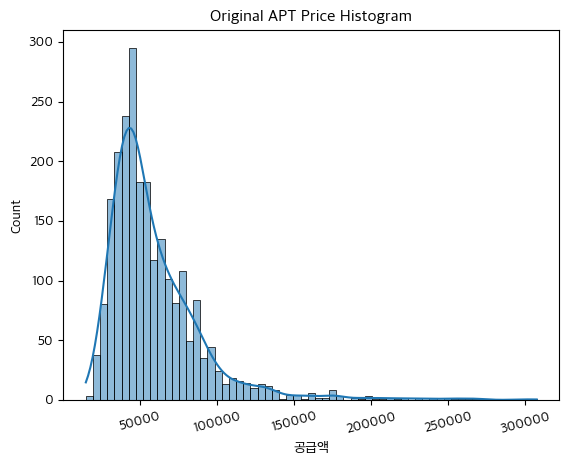

In [58]:
plt.title('Original APT Price Histogram')
plt.xticks(rotation=15)
sns.histplot(house['공급액'], kde=True)
plt.show()

In [59]:
# 왜도, 첨도 자세히 확인

print('왜도(Skewness) : %f' % house['공급액'].skew())
# 0보다 크면 오른쪽으로 치우침 작으면 왼쪽으로 치우침 -> 왜도가 0에 가까우면 좌우 대칭인 분포를 의미
# 2.666560은 양수이므로 데이터의 분포가 오른쪽으로 치우침 

print('첨도(Kurtosis) : %f' % house['공급액'].kurt())
# 첨도가 3보다 크면 뾰족한 꼬리, 작으면 둥근 꼬리
# 첨도가 3인 경우를 정규분포로 간주 (3보다 크므로 분포가 정규분포보다 뾰족한 형태)


print('왜도결과 : 주택 가격 데이터에서는 비교적 높은 가격의 주택들이 존재')
print('첨도결과 : 공급액 분포가 정규분포보다 뾰족하고 중앙 부분에 더 많은 데이터가 집중됨.')

왜도(Skewness) : 2.666560
첨도(Kurtosis) : 11.220632
왜도결과 : 주택 가격 데이터에서는 비교적 높은 가격의 주택들이 존재
첨도결과 : 공급액 분포가 정규분포보다 뾰족하고 중앙 부분에 더 많은 데이터가 집중됨.


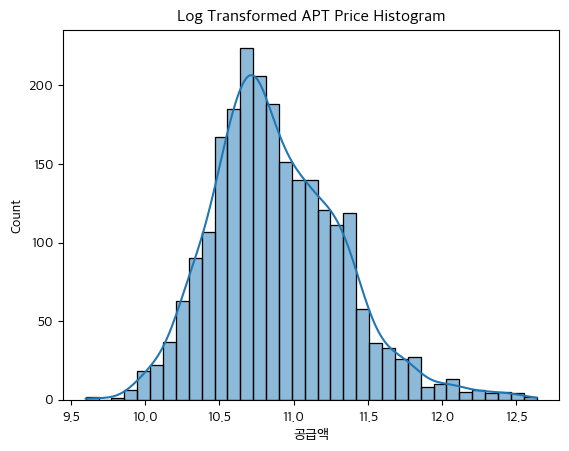

In [60]:
# 로그변환
plt.title('Log Transformed APT Price Histogram')
log_SalePrice = np.log1p(house['공급액'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

### **2) categorical features 분포 확인**

In [61]:
before_onehot_df.columns

Index(['아파트명', '법정동주소', '위도', '경도', '세대수', '임대세대수', '최고층', '최저층', '최대공급면적',
       '최소공급면적', '총아파트동수', '용적률', '건폐율', '세대평균_주차대수', '공급면적', '전용면적', '전용율',
       '방수', '욕실수', '현관구조', '입주예정연도', '공급액(만원)', '대형건설사', '지하철역', '지하철역_거리',
       '역사명', '노선명_리스트', '1차병원', '2차병원', '3차병원', '공원', '대학', '광역', '기초', '소매',
       '음식', '교육', '장례식장', '보건의료', '유원지오락', '총인구수'],
      dtype='object')

In [62]:
object = before_onehot_df.select_dtypes(include=['object'])
object_col = object.columns
print('카테고리 columns : ', object_col)

카테고리 columns :  Index(['아파트명', '법정동주소', '현관구조', '지하철역', '역사명', '노선명_리스트', '광역', '기초', '소매',
       '음식', '교육', '보건의료', '유원지오락', '총인구수'],
      dtype='object')


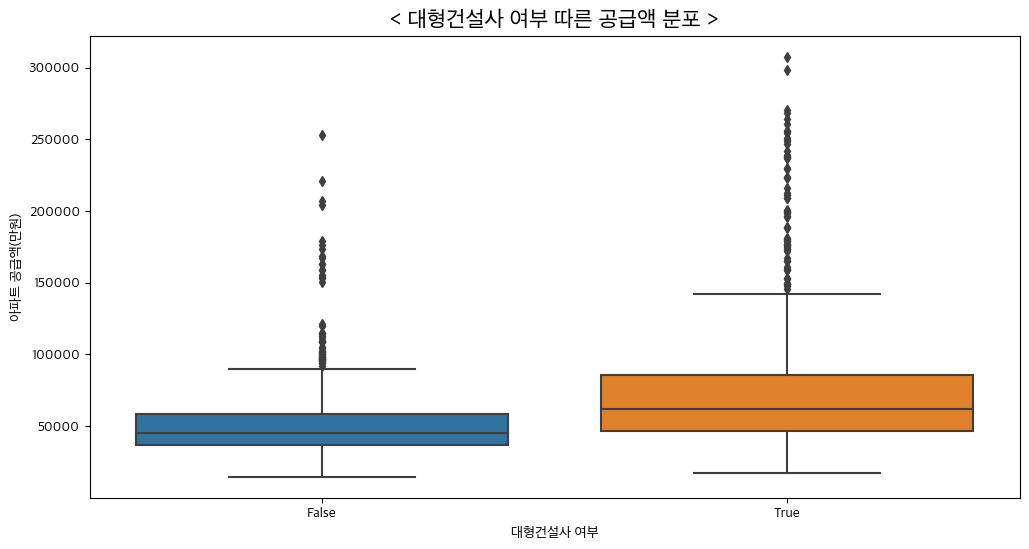

In [63]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='대형건설사', y='공급액(만원)', data=before_onehot_df)

plt.title('< 대형건설사 여부 따른 공급액 분포 >', fontsize=16, fontweight='bold')
plt.xlabel("대형건설사 여부")
plt.ylabel("아파트 공급액(만원)")

plt.show()

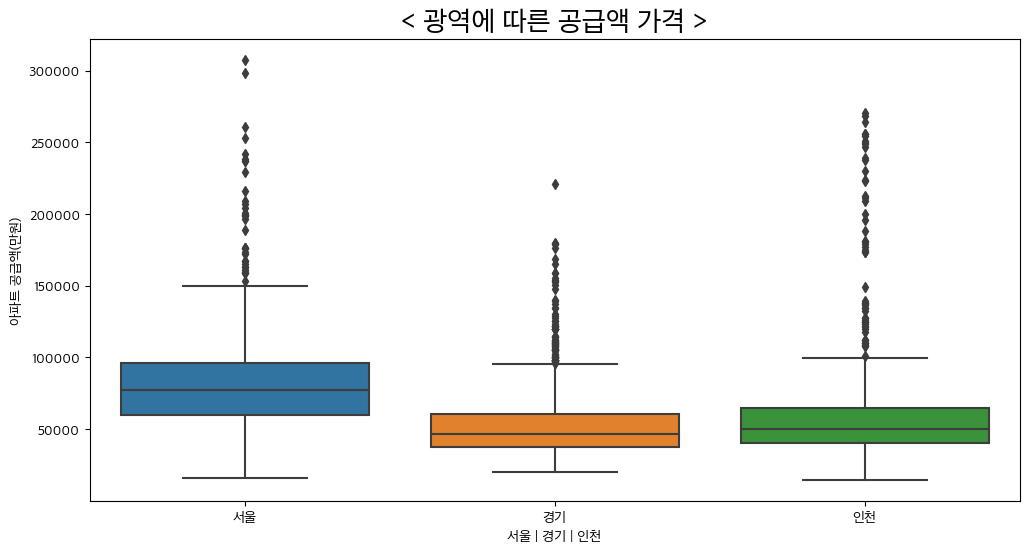

In [64]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(x='광역', y='공급액(만원)', data=before_onehot_df)

plt.title('< 광역에 따른 공급액 가격 >', fontsize=20, fontweight='bold')
plt.xlabel('서울 | 경기 | 인천')
plt.ylabel("아파트 공급액(만원)")

plt.show()

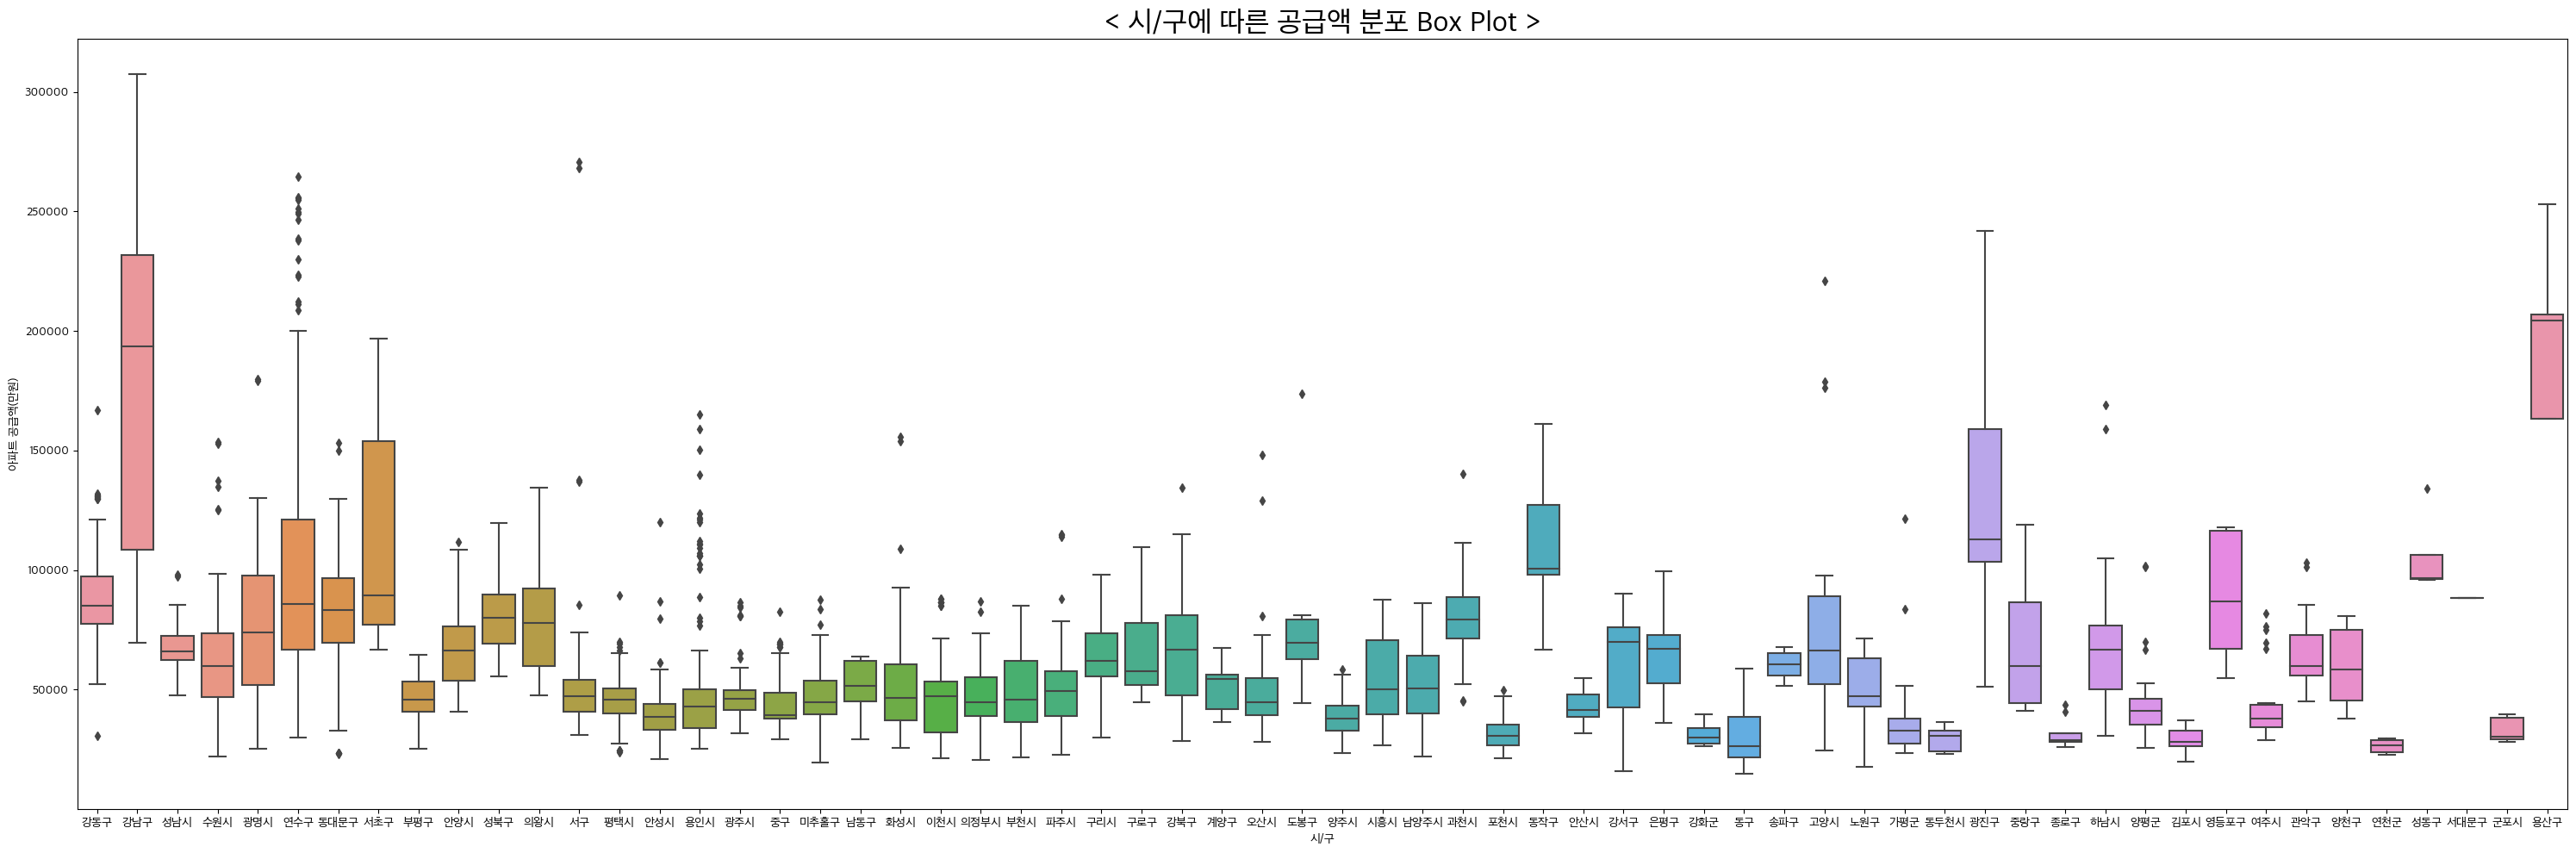

In [65]:
plt.figure(figsize=(30, 10)) 

sns.boxplot(x='기초', y='공급액(만원)', data=before_onehot_df)

plt.title('< 시/구에 따른 공급액 분포 Box Plot >', fontsize=24, fontweight='bold')
plt.xlabel("시/구")
plt.ylabel("아파트 공급액(만원)")

plt.tight_layout()
plt.show()

### **3) 건물의 크기, 면적, 구조와 공급액의 상관관계**

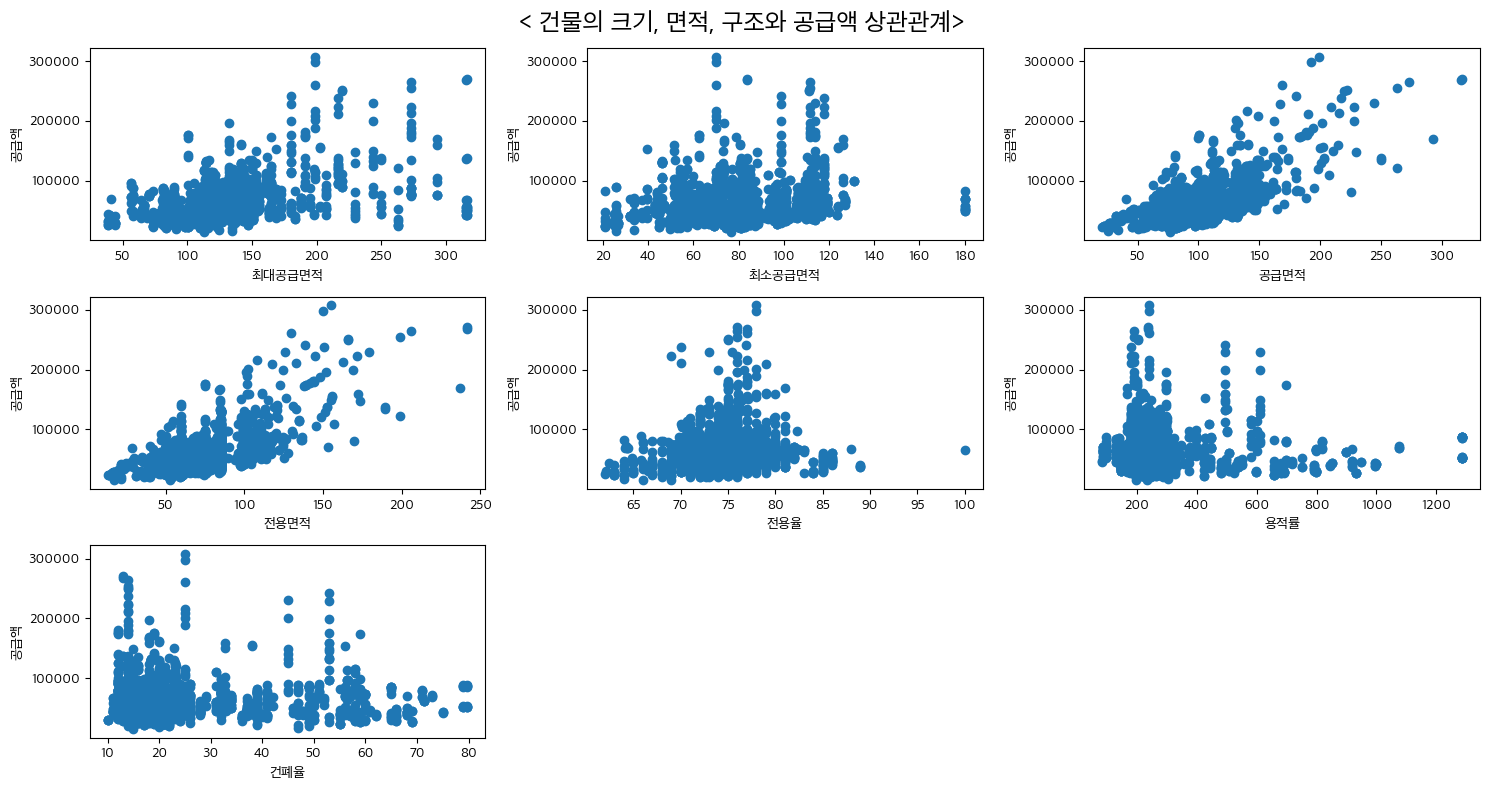

In [66]:
# 3행 2열로 산점도 그래프 그리기
plt.figure(figsize=(15, 8))

plt.subplot(3, 3, 1)
plt.scatter(x='최대공급면적', y='공급액', data=house)
plt.xlabel('최대공급면적')
plt.ylabel('공급액')

plt.subplot(3, 3, 2)
plt.scatter(x='최소공급면적', y='공급액', data=house)
plt.xlabel('최소공급면적')
plt.ylabel('공급액')

plt.subplot(3, 3, 3)
plt.scatter(x='공급면적', y='공급액', data=house)
plt.xlabel('공급면적')
plt.ylabel('공급액')

plt.subplot(3, 3, 4)
plt.scatter(x='전용면적', y='공급액', data=house)
plt.xlabel('전용면적')
plt.ylabel('공급액')

plt.subplot(3, 3, 5)
plt.scatter(x='전용율', y='공급액', data=house)
plt.xlabel('전용율')
plt.ylabel('공급액')

plt.subplot(3, 3, 6)
plt.scatter(x='용적률', y='공급액', data=house)
plt.xlabel('용적률')
plt.ylabel('공급액')

plt.subplot(3, 3, 7)
plt.scatter(x='건폐율', y='공급액', data=house)
plt.xlabel('건폐율')
plt.ylabel('공급액')

plt.suptitle('< 건물의 크기, 면적, 구조와 공급액 상관관계> ', fontsize=18, fontweight='bold') 
plt.tight_layout()
plt.show()

### **4) 주변 시설의 수와 공급액의 상관관계**

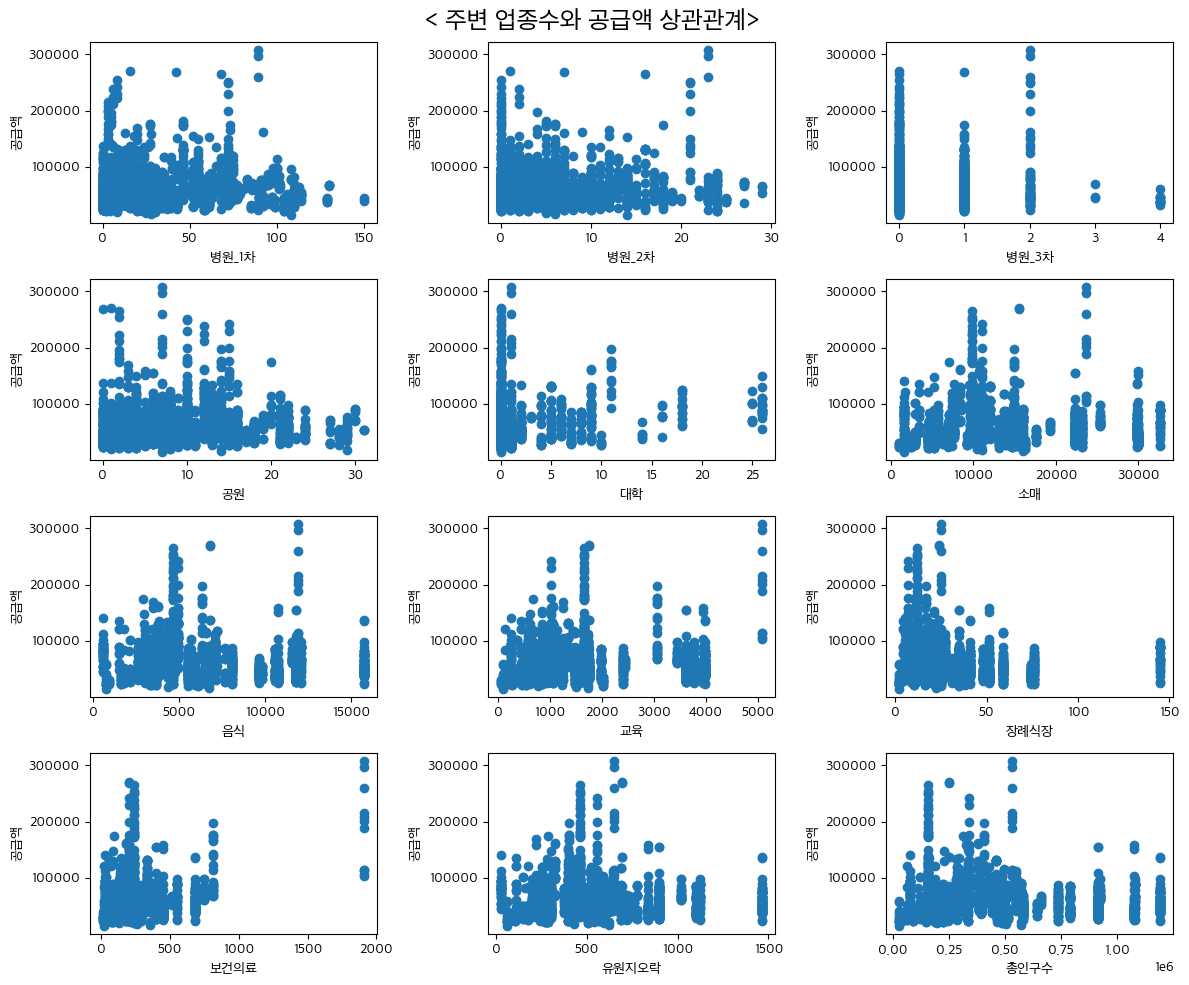

In [67]:
plt.figure(figsize=(12, 10)) 

plt.subplot(4, 3, 1)
plt.scatter(x='병원_1차', y='공급액', data=house)
plt.xlabel('병원_1차')
plt.ylabel('공급액')

plt.subplot(4, 3, 2)
plt.scatter(x='병원_2차', y='공급액', data=house)
plt.xlabel('병원_2차')
plt.ylabel('공급액')

plt.subplot(4, 3, 3)
plt.scatter(x='병원_3차', y='공급액', data=house)
plt.xlabel('병원_3차')
plt.ylabel('공급액')

plt.subplot(4, 3, 4)
plt.scatter(x='공원', y='공급액', data=house)
plt.xlabel('공원')
plt.ylabel('공급액')

plt.subplot(4, 3, 5)
plt.scatter(x='대학', y='공급액', data=house)
plt.xlabel('대학')
plt.ylabel('공급액')

plt.subplot(4, 3, 6)
plt.scatter(x='소매', y='공급액', data=house)
plt.xlabel('소매')
plt.ylabel('공급액')

plt.subplot(4, 3, 7)
plt.scatter(x='음식', y='공급액', data=house)
plt.xlabel('음식')
plt.ylabel('공급액')

plt.subplot(4, 3, 8)
plt.scatter(x='교육', y='공급액', data=house)
plt.xlabel('교육')
plt.ylabel('공급액')

plt.subplot(4, 3, 9)
plt.scatter(x='장례식장', y='공급액', data=house)
plt.xlabel('장례식장')
plt.ylabel('공급액')

plt.subplot(4, 3, 10)
plt.scatter(x='보건의료', y='공급액', data=house)
plt.xlabel('보건의료')
plt.ylabel('공급액')

plt.subplot(4, 3, 11)
plt.scatter(x='유원지오락', y='공급액', data=house)
plt.xlabel('유원지오락')
plt.ylabel('공급액')

plt.subplot(4, 3, 12)
plt.scatter(x='총인구수', y='공급액', data=house)
plt.xlabel('총인구수')
plt.ylabel('공급액')

plt.suptitle('< 주변 업종수와 공급액 상관관계> ', fontsize=18, fontweight='bold') 
plt.tight_layout()
plt.show()

### **5) 공급액이 가장 높은(상위) & 낮은(하위) 10위 아파트**

In [68]:
# # 중복
# # 공급액을 기준으로 데이터 정렬 (상위 10)
# top10_apt = before_onehot_df.drop_duplicates(subset=['아파트명']).nlargest(10, '공급액(만원)')
# sort_apt = before_onehot_df.sort_values(by='공급액(만원)', ascending=False)
# top10_apt = sort_apt.head(10)

# # '아파트명'과 '공급액' 컬럼 선택
# selected_columns = ['아파트명', '광역', '기초', '공급액(만원)']
# top10_apt_selected = top10_apt[selected_columns]
# top10_apt_selected

In [69]:
# 중복제거 후 상위 10개
not_duplicates_top10_apt = before_onehot_df.drop_duplicates(subset=['아파트명']).nlargest(10, '공급액(만원)')

# '아파트명'과 '공급액' 컬럼 선택
selected_columns = ['아파트명', '광역', '기초', '공급액(만원)']
top10_apt_selected = not_duplicates_top10_apt[selected_columns]
top10_apt_selected

,아파트명,광역,기초,공급액(만원)
129,대치 푸르지오 써밋,서울,강남구,307610
798,검암역 로열파크씨티 푸르지오 2단지,인천,서구,270560
808,검암역 로열파크씨티 푸르지오 1단지,인천,서구,268110
447,송도자이 크리스탈오션,인천,연수구,264500
469,힐스테이트 송도 더스카이,인천,연수구,256020
3128,용산 호반써밋 에이디션,서울,용산구,252990
379,힐스테이트 레이크 송도 4차,인천,연수구,251200
2873,롯데캐슬 이스트폴,서울,광진구,242000
118,디에이치 퍼스티어 아이파크,서울,강남구,238316
427,송도자이 더 스타,인천,연수구,237890


In [70]:
# 중복
# # 공급액을 기준으로 데이터 정렬 (하위 10)
# sort_apt = before_onehot_df.sort_values(by='공급액(만원)', ascending=True)
# low10_apt = sort_apt.head(10)

# # '아파트명'과 '공급액' 컬럼 선택
# selected_columns = ['아파트명', '광역', '기초', '공급액(만원)']
# low10_apt_selected = low10_apt[selected_columns]
# low10_apt_selected

In [71]:
# 중복제거 후 하위 10개
not_duplicates_bottom10_apt = before_onehot_df.drop_duplicates(subset=['아파트명']).nsmallest(10, '공급액(만원)')

# '아파트명'과 '공급액' 컬럼 선택
selected_columns = ['아파트명', '광역', '기초', '공급액(만원)']
bottom10_apt_selected = not_duplicates_bottom10_apt[selected_columns]
bottom10_apt_selected

,아파트명,광역,기초,공급액(만원)
2776,인천 만석웰카운티,인천,동구,14765
3019,e편한세상 김포 어반베뉴,경기,김포시,22640
2763,인천강화 서희스타힐스 2단지,인천,강화군,26800
2166,파주연풍 양우내안애 에코하임,경기,파주시,26968
2772,인천 LH 브리즈힐,인천,동구,27138
1023,이안 평택 안중역 아파트,경기,평택시,27440
1979,대가트라움(의정부),경기,의정부시,27500
2622,포천 모아엘가 리더스파크,경기,포천시,29000
3023,김포마송택지지구 디에트르,경기,김포시,29048
3101,e편한세상 연천 웰스하임,경기,연천군,29600


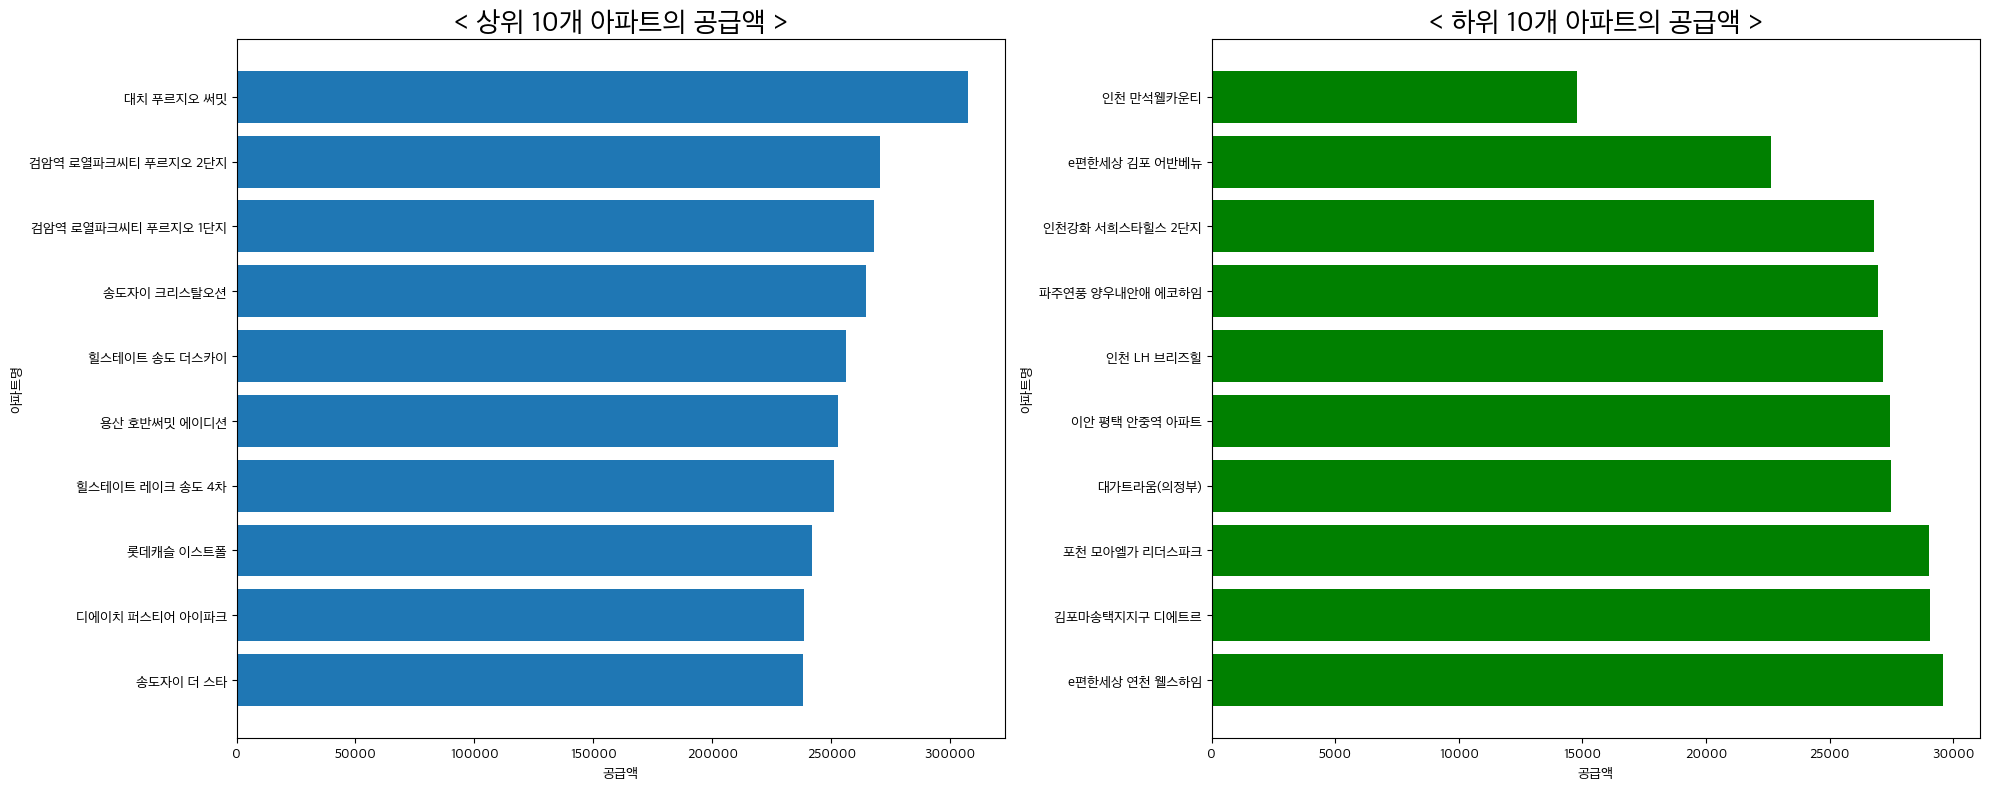

In [72]:
# 피규어와 서브플롯 생성
plt.figure(figsize=(20, 8))

# 첫 번째 서브플롯
plt.subplot(1, 2, 1)  
plt.barh(not_duplicates_top10_apt['아파트명'], not_duplicates_top10_apt['공급액(만원)'])
plt.xlabel('공급액')
plt.ylabel('아파트명')
plt.title('< 상위 10개 아파트의 공급액 >', fontsize=20, fontweight='bold')
plt.gca().invert_yaxis()

# 두 번째 서브플롯
plt.subplot(1, 2, 2) 
plt.barh(bottom10_apt_selected['아파트명'], bottom10_apt_selected['공급액(만원)'], color='green')
plt.xlabel('공급액')
plt.ylabel('아파트명')
plt.title('< 하위 10개 아파트의 공급액 >', fontsize=20, fontweight='bold')
plt.gca().invert_yaxis()

# 피규어 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

### **6) 연속형 피처와 y값의 상관관계**

In [73]:
# 연속형 & 명목형 & 범주형 피처 나누기
apt_data = house.copy()

# 연속형 변수
continuous_X = ['위도', '경도', '세대수', '최대공급면적', '최소공급면적', '전용율', '임대세대수', '최고층', '최저층',	'총아파트동수', '용적률', '건폐율',	'세대평균_주차대수', '공급면적', '전용면적', '방수', '욕실수', 
                '지하철역_거리', '병원_1차', '병원_2차', '병원_3차', '공원', '대학', '소매', '음식', '교육', '장례식장', '보건의료', '유원지오락', '총인구수',
                '공급액'] # y값 공급액 컬럼 포함시킴

# 명목형 변수
nominal_X = ['아파트명', '법정동주소', '지하철역', '역사명']

# 범주형 변수 
categorical_X = [feature for feature in apt_data if feature not in continuous_X and feature not in nominal_X]


print('연속형 변수 :', continuous_X)
print('명목형 변수 :', nominal_X)
print('범주형 변수 :', categorical_X)

연속형 변수 : ['위도', '경도', '세대수', '최대공급면적', '최소공급면적', '전용율', '임대세대수', '최고층', '최저층', '총아파트동수', '용적률', '건폐율', '세대평균_주차대수', '공급면적', '전용면적', '방수', '욕실수', '지하철역_거리', '병원_1차', '병원_2차', '병원_3차', '공원', '대학', '소매', '음식', '교육', '장례식장', '보건의료', '유원지오락', '총인구수', '공급액']
명목형 변수 : ['아파트명', '법정동주소', '지하철역', '역사명']
범주형 변수 : ['현관구조', '대형건설사', '노선_진접선', '노선_8호선', '노선_경강선', '노선_경춘선', '노선_신분당선', '노선_3호선', '노선_수인선', '노선_경의중앙선', '노선_우이신설선', '노선_분당선', '노선_김포골드라인', '노선_인천_1호선', '노선_의정부선', '노선_에버라인', '노선_인천_2호선', '노선_신림선', '노선_6호선', '노선_2호선', '노선_1호선', '노선_서해선', '노선_9호선', '노선_4호선', '노선_5호선', '노선_인천국제공항선', '노선_7호선', '타입', '광역_경기', '광역_서울', '광역_인천', '기초_경기_가평군', '기초_경기_고양시', '기초_경기_과천시', '기초_경기_광명시', '기초_경기_광주시', '기초_경기_구리시', '기초_경기_군포시', '기초_경기_김포시', '기초_경기_남양주시', '기초_경기_동두천시', '기초_경기_부천시', '기초_경기_성남시', '기초_경기_수원시', '기초_경기_시흥시', '기초_경기_안산시', '기초_경기_안성시', '기초_경기_안양시', '기초_경기_양주시', '기초_경기_양평군', '기초_경기_여주시', '기초_경기_연천군', '기초_경기_오산시', '기초_경기_용인시', '기초_경기_의왕시', '기초_경기_의정부시', '기초_경기_이천시', '기초_경기_파주시', '기초_경기_평택시', '기초_경기_포

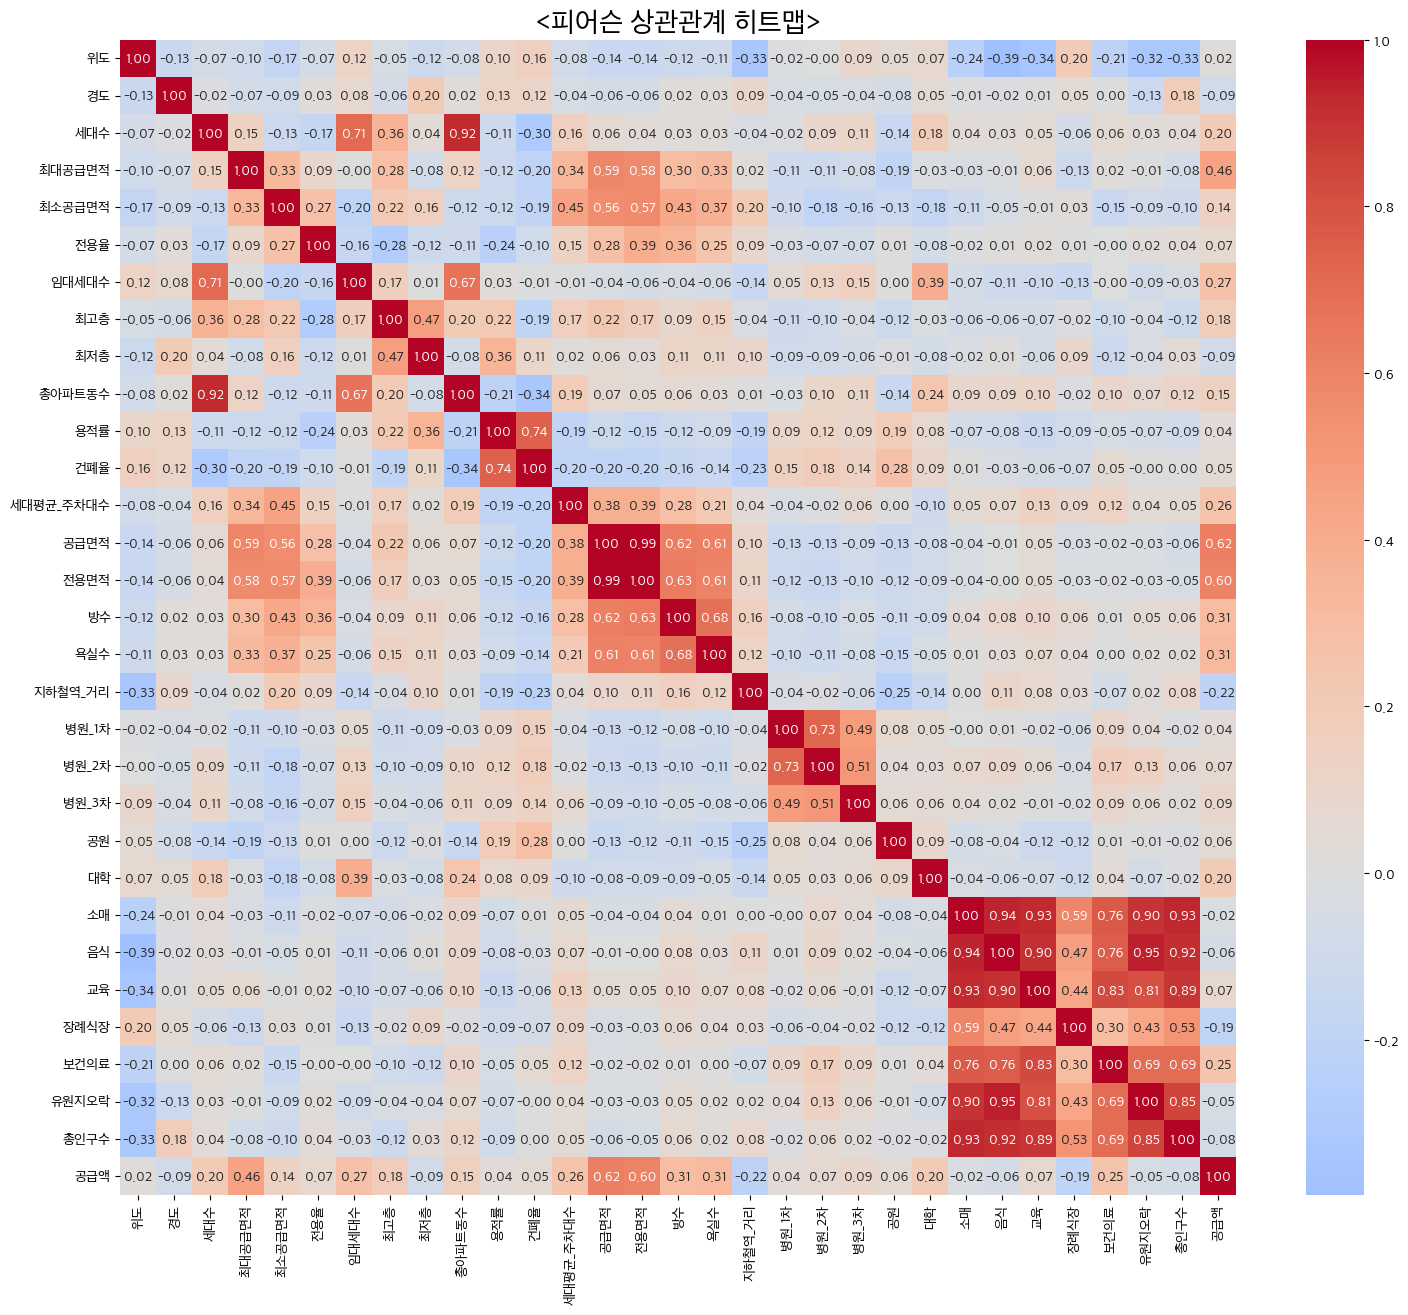

In [74]:
# 연속형X와 y의 상관관계 계산
corr = apt_data[continuous_X].corr()

# Heatmap 상관관계 시각화
plt.figure(figsize=(18, 15))
sns.heatmap(corr,  annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('<피어슨 상관관계 히트맵>', fontsize=20, fontweight='bold')
plt.show()

### **7) 연속형 피처 히스토그램**

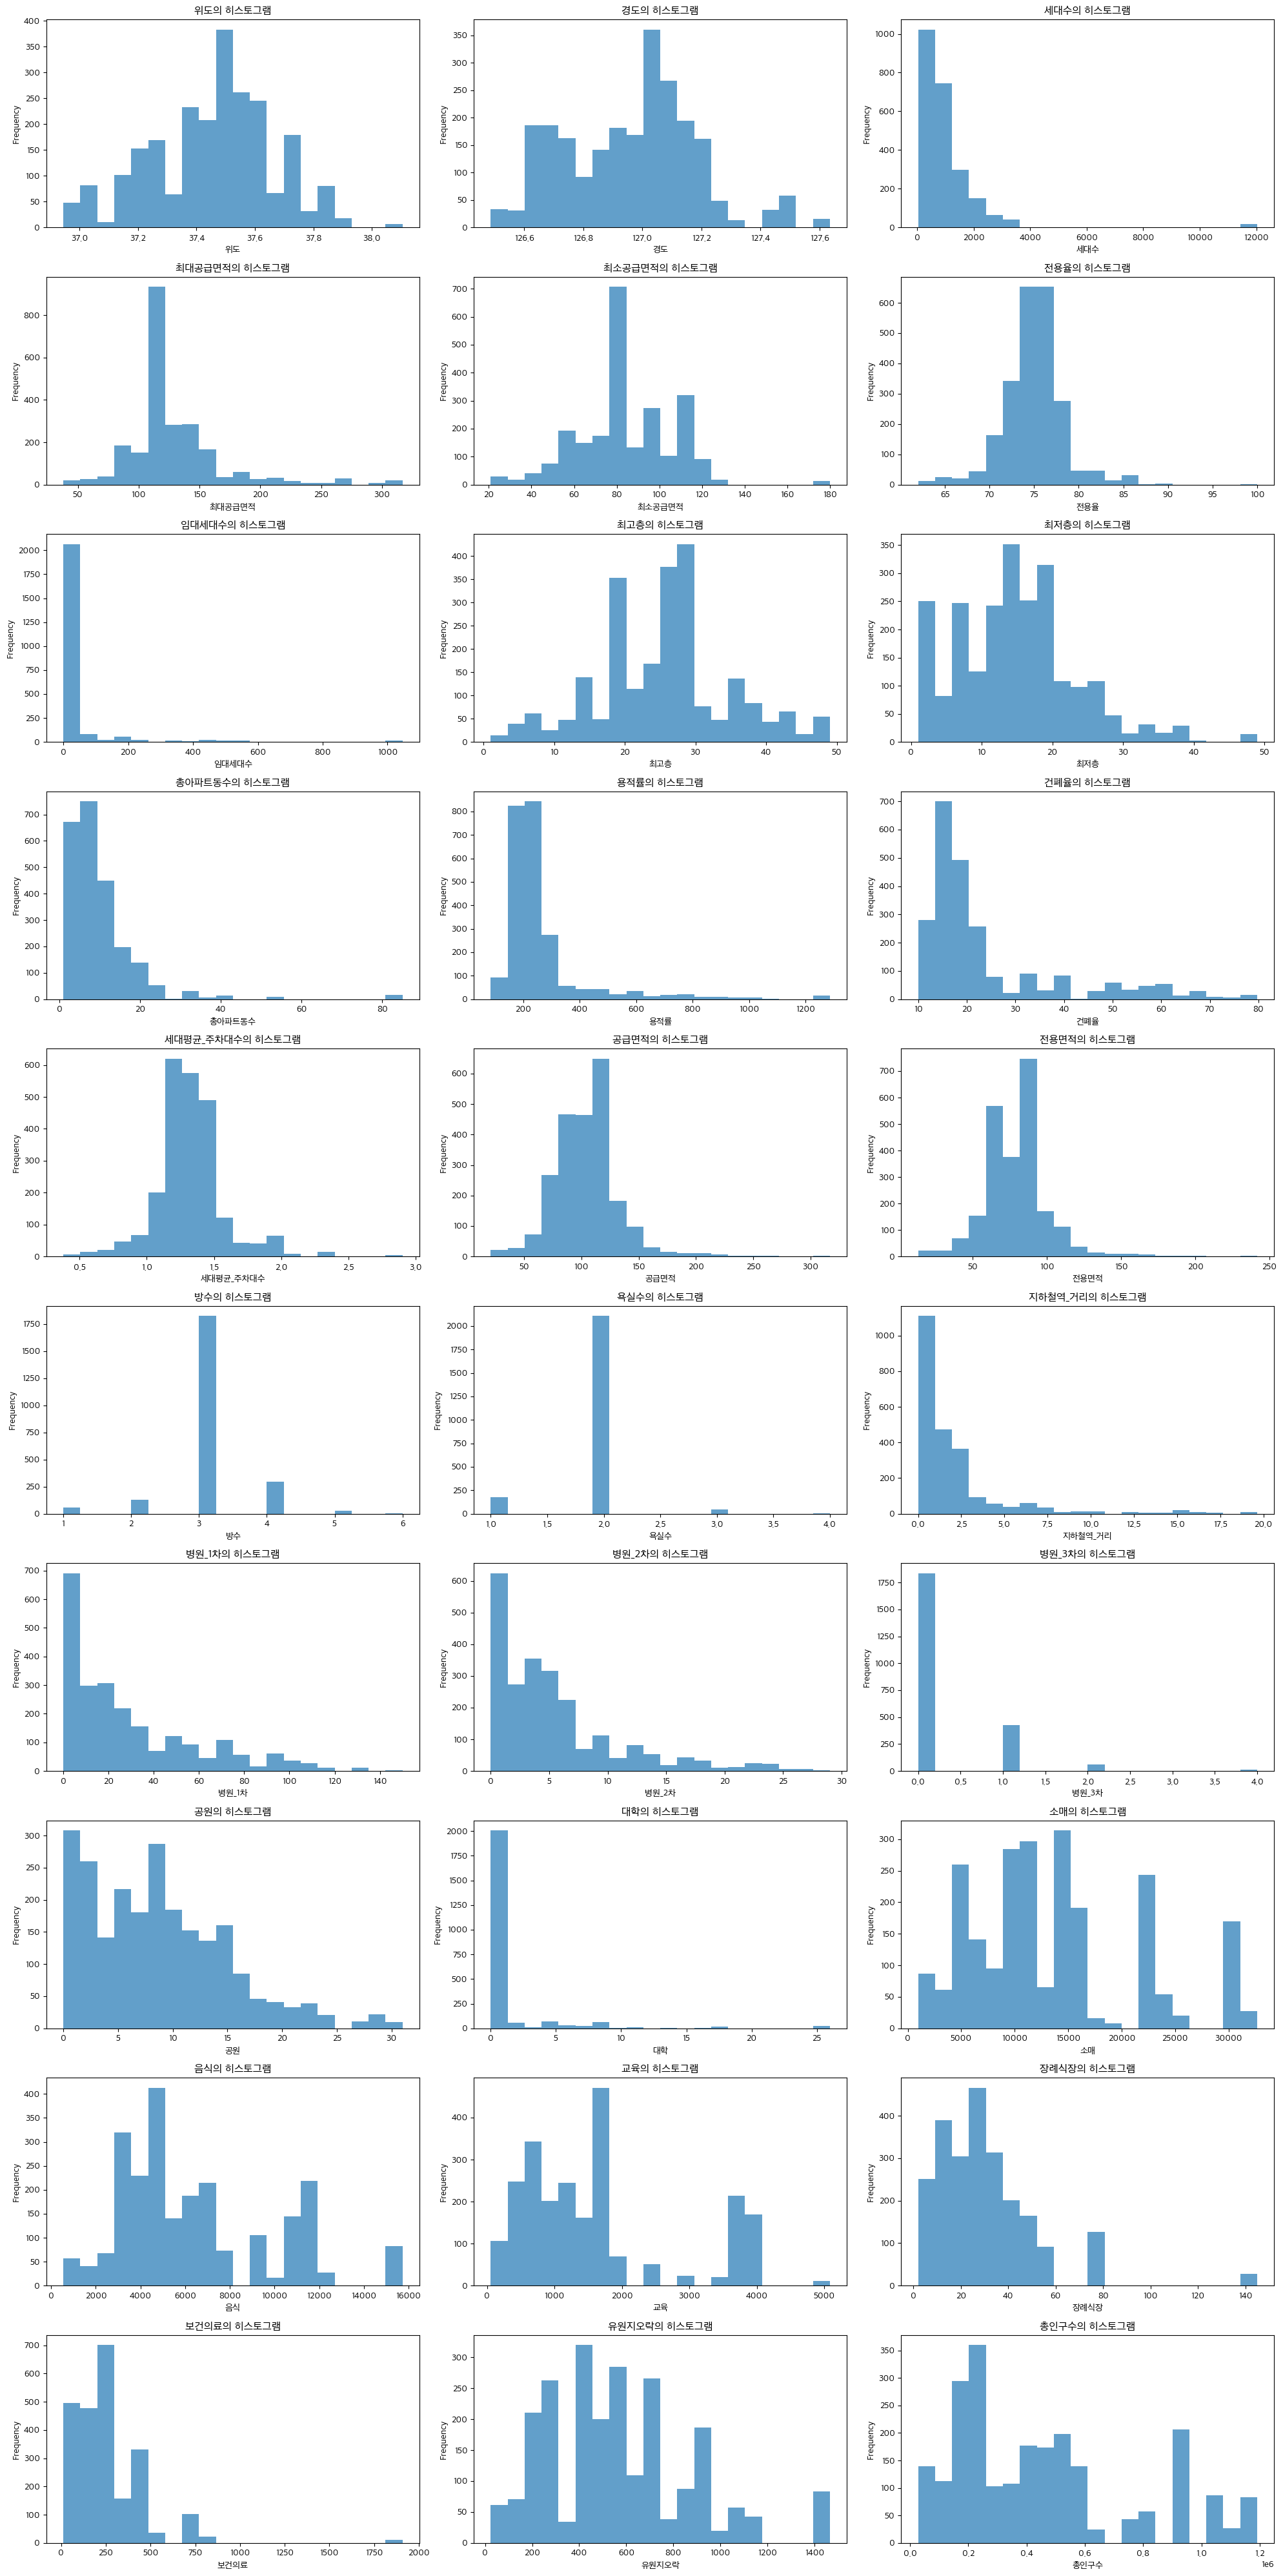

In [75]:
# 공급액 지운 연속형 변수
continuous_columns = apt_data[continuous_X].drop(columns=['공급액'])

plt.figure(figsize=(20, 40))
 
for i, column in enumerate(continuous_columns.columns, 1) :
    plt.subplot(10, 3, i)  
    plt.hist(continuous_columns[column], bins=20, alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'{column}의 히스토그램')

plt.tight_layout()

plt.show()

# **4. 데이터 전처리**

In [76]:
list(apt_data.columns)

['아파트명',
 '법정동주소',
 '위도',
 '경도',
 '세대수',
 '임대세대수',
 '최고층',
 '최저층',
 '최대공급면적',
 '최소공급면적',
 '총아파트동수',
 '용적률',
 '건폐율',
 '세대평균_주차대수',
 '공급면적',
 '전용면적',
 '전용율',
 '방수',
 '욕실수',
 '현관구조',
 '공급액',
 '대형건설사',
 '지하철역',
 '지하철역_거리',
 '역사명',
 '병원_1차',
 '병원_2차',
 '병원_3차',
 '공원',
 '대학',
 '소매',
 '음식',
 '교육',
 '장례식장',
 '보건의료',
 '유원지오락',
 '총인구수',
 '노선_진접선',
 '노선_8호선',
 '노선_경강선',
 '노선_경춘선',
 '노선_신분당선',
 '노선_3호선',
 '노선_수인선',
 '노선_경의중앙선',
 '노선_우이신설선',
 '노선_분당선',
 '노선_김포골드라인',
 '노선_인천_1호선',
 '노선_의정부선',
 '노선_에버라인',
 '노선_인천_2호선',
 '노선_신림선',
 '노선_6호선',
 '노선_2호선',
 '노선_1호선',
 '노선_서해선',
 '노선_9호선',
 '노선_4호선',
 '노선_5호선',
 '노선_인천국제공항선',
 '노선_7호선',
 '타입',
 '광역_경기',
 '광역_서울',
 '광역_인천',
 '기초_경기_가평군',
 '기초_경기_고양시',
 '기초_경기_과천시',
 '기초_경기_광명시',
 '기초_경기_광주시',
 '기초_경기_구리시',
 '기초_경기_군포시',
 '기초_경기_김포시',
 '기초_경기_남양주시',
 '기초_경기_동두천시',
 '기초_경기_부천시',
 '기초_경기_성남시',
 '기초_경기_수원시',
 '기초_경기_시흥시',
 '기초_경기_안산시',
 '기초_경기_안성시',
 '기초_경기_안양시',
 '기초_경기_양주시',
 '기초_경기_양평군',
 '기초_경기_여주시',
 '기초_경기_연천군',
 '기초_경기_오산시',
 '기초_경기_용인시',
 '기초_경기_의왕시',
 

In [77]:
# 컬럼값이 너무 많아 세부 내용 확인불가
apt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Columns: 135 entries, 아파트명 to 입주예정연도_2026
dtypes: bool(73), float64(17), int64(40), object(5)
memory usage: 1.3+ MB


### **1) 결측값 확인**

In [78]:
# 결측값 확인
# house.isna().sum()

# 결측값이 있는 컬럼만 필터링해서 출력 -> 결측값 없음
missing_values = apt_data.isna().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

### **2) 타입별 X 확인 및 필요없는 피처 drop**

In [79]:
# 각 데이터 타입별로 컬럼 변수 분리
# info : bool(73), float64(17), int64(40), object(5)

object = apt_data.select_dtypes(include=['object'])
int = apt_data.select_dtypes(include=['int'])
float = apt_data.select_dtypes(include=['float'])
bool = apt_data.select_dtypes(include=['bool'])

# 타입별 X
object_col = object.columns
int_col = int.columns
float_col = float.columns
bool_col = bool.columns

In [80]:
print('1. object columns : ')
print(object_col, '\n')

1. object columns : 
Index(['아파트명', '법정동주소', '현관구조', '지하철역', '역사명'], dtype='object') 



In [81]:
# 명목형 object형 컬럼 전체 drop
apt_data.drop(['아파트명', '법정동주소', '현관구조', '지하철역', '역사명'], axis=1, inplace=True)
apt_data.head(2)

,위도,경도,세대수,임대세대수,최고층,최저층,최대공급면적,최소공급면적,총아파트동수,용적률,건폐율,세대평균_주차대수,공급면적,전용면적,전용율,방수,욕실수,공급액,대형건설사,지하철역_거리,병원_1차,병원_2차,병원_3차,공원,대학,소매,음식,교육,장례식장,보건의료,유원지오락,총인구수,노선_진접선,노선_8호선,노선_경강선,노선_경춘선,노선_신분당선,노선_3호선,노선_수인선,노선_경의중앙선,노선_우이신설선,노선_분당선,노선_김포골드라인,노선_인천_1호선,노선_의정부선,노선_에버라인,노선_인천_2호선,노선_신림선,노선_6호선,노선_2호선,노선_1호선,노선_서해선,노선_9호선,노선_4호선,노선_5호선,노선_인천국제공항선,노선_7호선,타입,광역_경기,광역_서울,광역_인천,기초_경기_가평군,기초_경기_고양시,기초_경기_과천시,기초_경기_광명시,기초_경기_광주시,기초_경기_구리시,기초_경기_군포시,기초_경기_김포시,기초_경기_남양주시,기초_경기_동두천시,기초_경기_부천시,기초_경기_성남시,기초_경기_수원시,기초_경기_시흥시,기초_경기_안산시,기초_경기_안성시,기초_경기_안양시,기초_경기_양주시,기초_경기_양평군,기초_경기_여주시,기초_경기_연천군,기초_경기_오산시,기초_경기_용인시,기초_경기_의왕시,기초_경기_의정부시,기초_경기_이천시,기초_경기_파주시,기초_경기_평택시,기초_경기_포천시,기초_경기_하남시,기초_경기_화성시,기초_서울_강남구,기초_서울_강동구,기초_서울_강북구,기초_서울_강서구,기초_서울_관악구,기초_서울_광진구,기초_서울_구로구,기초_서울_노원구,기초_서울_도봉구,기초_서울_동대문구,기초_서울_동작구,기초_서울_서대문구,기초_서울_서초구,기초_서울_성동구,기초_서울_성북구,기초_서울_송파구,기초_서울_양천구,기초_서울_영등포구,기초_서울_은평구,기초_서울_종로구,기초_서울_중구,기초_서울_중랑구,기초_인천_강화군,기초_인천_계양구,기초_인천_남동구,기초_인천_동구,기초_인천_미추홀구,기초_인천_부평구,기초_인천_서구,기초_인천_연수구,기초_인천_중구,입주예정연도_2020,입주예정연도_2021,입주예정연도_2022,입주예정연도_2023,입주예정연도_2024,입주예정연도_2025,입주예정연도_2026
0,37.522886,127.140539,12032,1046.0,35.0,20.0,114.42,46.21,85.0,273.89,18.4,1.487118,114.26,84.99,74.382986,3.0,2.0,132040,True,0.6636,46,16,1,3,5,12030,4934,1344,19,332,431,460141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,37.522886,127.140539,12032,1046.0,35.0,20.0,114.42,46.21,85.0,273.89,18.4,1.487118,113.60,84.98,74.806338,3.0,2.0,131280,True,0.6636,46,16,1,3,5,12030,4934,1344,19,332,431,460141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [82]:
# 정수형 컬럼
print('2. int columns :')
print(int_col, '\n')

# X['타입'] # 세대타입 (84A, B)

2. int columns :
Index(['세대수', '공급액', '병원_1차', '병원_2차', '병원_3차', '공원', '대학', '소매', '음식', '교육',
       '장례식장', '보건의료', '유원지오락', '총인구수', '노선_진접선', '노선_8호선', '노선_경강선', '노선_경춘선',
       '노선_신분당선', '노선_3호선', '노선_수인선', '노선_경의중앙선', '노선_우이신설선', '노선_분당선',
       '노선_김포골드라인', '노선_인천_1호선', '노선_의정부선', '노선_에버라인', '노선_인천_2호선', '노선_신림선',
       '노선_6호선', '노선_2호선', '노선_1호선', '노선_서해선', '노선_9호선', '노선_4호선', '노선_5호선',
       '노선_인천국제공항선', '노선_7호선', '타입'],
      dtype='object') 



In [83]:
# 실수형 컬럼
print('3. float columns :')
print(float_col, '\n')

3. float columns :
Index(['위도', '경도', '임대세대수', '최고층', '최저층', '최대공급면적', '최소공급면적', '총아파트동수', '용적률',
       '건폐율', '세대평균_주차대수', '공급면적', '전용면적', '전용율', '방수', '욕실수', '지하철역_거리'],
      dtype='object') 



In [84]:
# 필요없는 실수형 컬럼 drop
apt_data.drop(['위도', '경도'], axis=1, inplace=True)
apt_data.head(2)

,세대수,임대세대수,최고층,최저층,최대공급면적,최소공급면적,총아파트동수,용적률,건폐율,세대평균_주차대수,공급면적,전용면적,전용율,방수,욕실수,공급액,대형건설사,지하철역_거리,병원_1차,병원_2차,병원_3차,공원,대학,소매,음식,교육,장례식장,보건의료,유원지오락,총인구수,노선_진접선,노선_8호선,노선_경강선,노선_경춘선,노선_신분당선,노선_3호선,노선_수인선,노선_경의중앙선,노선_우이신설선,노선_분당선,노선_김포골드라인,노선_인천_1호선,노선_의정부선,노선_에버라인,노선_인천_2호선,노선_신림선,노선_6호선,노선_2호선,노선_1호선,노선_서해선,노선_9호선,노선_4호선,노선_5호선,노선_인천국제공항선,노선_7호선,타입,광역_경기,광역_서울,광역_인천,기초_경기_가평군,기초_경기_고양시,기초_경기_과천시,기초_경기_광명시,기초_경기_광주시,기초_경기_구리시,기초_경기_군포시,기초_경기_김포시,기초_경기_남양주시,기초_경기_동두천시,기초_경기_부천시,기초_경기_성남시,기초_경기_수원시,기초_경기_시흥시,기초_경기_안산시,기초_경기_안성시,기초_경기_안양시,기초_경기_양주시,기초_경기_양평군,기초_경기_여주시,기초_경기_연천군,기초_경기_오산시,기초_경기_용인시,기초_경기_의왕시,기초_경기_의정부시,기초_경기_이천시,기초_경기_파주시,기초_경기_평택시,기초_경기_포천시,기초_경기_하남시,기초_경기_화성시,기초_서울_강남구,기초_서울_강동구,기초_서울_강북구,기초_서울_강서구,기초_서울_관악구,기초_서울_광진구,기초_서울_구로구,기초_서울_노원구,기초_서울_도봉구,기초_서울_동대문구,기초_서울_동작구,기초_서울_서대문구,기초_서울_서초구,기초_서울_성동구,기초_서울_성북구,기초_서울_송파구,기초_서울_양천구,기초_서울_영등포구,기초_서울_은평구,기초_서울_종로구,기초_서울_중구,기초_서울_중랑구,기초_인천_강화군,기초_인천_계양구,기초_인천_남동구,기초_인천_동구,기초_인천_미추홀구,기초_인천_부평구,기초_인천_서구,기초_인천_연수구,기초_인천_중구,입주예정연도_2020,입주예정연도_2021,입주예정연도_2022,입주예정연도_2023,입주예정연도_2024,입주예정연도_2025,입주예정연도_2026
0,12032,1046.0,35.0,20.0,114.42,46.21,85.0,273.89,18.4,1.487118,114.26,84.99,74.382986,3.0,2.0,132040,True,0.6636,46,16,1,3,5,12030,4934,1344,19,332,431,460141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,12032,1046.0,35.0,20.0,114.42,46.21,85.0,273.89,18.4,1.487118,113.60,84.98,74.806338,3.0,2.0,131280,True,0.6636,46,16,1,3,5,12030,4934,1344,19,332,431,460141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [85]:
print('4. bool columns :')
print(bool_col, '\n')

4. bool columns :
Index(['대형건설사', '광역_경기', '광역_서울', '광역_인천', '기초_경기_가평군', '기초_경기_고양시',
       '기초_경기_과천시', '기초_경기_광명시', '기초_경기_광주시', '기초_경기_구리시', '기초_경기_군포시',
       '기초_경기_김포시', '기초_경기_남양주시', '기초_경기_동두천시', '기초_경기_부천시', '기초_경기_성남시',
       '기초_경기_수원시', '기초_경기_시흥시', '기초_경기_안산시', '기초_경기_안성시', '기초_경기_안양시',
       '기초_경기_양주시', '기초_경기_양평군', '기초_경기_여주시', '기초_경기_연천군', '기초_경기_오산시',
       '기초_경기_용인시', '기초_경기_의왕시', '기초_경기_의정부시', '기초_경기_이천시', '기초_경기_파주시',
       '기초_경기_평택시', '기초_경기_포천시', '기초_경기_하남시', '기초_경기_화성시', '기초_서울_강남구',
       '기초_서울_강동구', '기초_서울_강북구', '기초_서울_강서구', '기초_서울_관악구', '기초_서울_광진구',
       '기초_서울_구로구', '기초_서울_노원구', '기초_서울_도봉구', '기초_서울_동대문구', '기초_서울_동작구',
       '기초_서울_서대문구', '기초_서울_서초구', '기초_서울_성동구', '기초_서울_성북구', '기초_서울_송파구',
       '기초_서울_양천구', '기초_서울_영등포구', '기초_서울_은평구', '기초_서울_종로구', '기초_서울_중구',
       '기초_서울_중랑구', '기초_인천_강화군', '기초_인천_계양구', '기초_인천_남동구', '기초_인천_동구',
       '기초_인천_미추홀구', '기초_인천_부평구', '기초_인천_서구', '기초_인천_연수구', '기초_인천_중구',
       '입주예정연도_2020', '입주예정연도_2021', '입주예정연도_2

### **3) 데이터 형변환**
- '임대세대수', '최고층', '최저층', '총아파트동수', '방수', '욕실수' -> float -> int로 형변환하기
- bool타입 전체 -> int

In [86]:
# float -> int
# 대상 : '임대세대수', '최고층', '최저층', '용적률', '건폐율', '총아파트동수', '방수', '욕실수'
float_to_int_cols = ['임대세대수', '최고층', '최저층', '총아파트동수', '방수', '욕실수']

apt_data[float_to_int_cols].head(1)
apt_data[float_to_int_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   임대세대수   2335 non-null   float64
 1   최고층     2335 non-null   float64
 2   최저층     2335 non-null   float64
 3   총아파트동수  2335 non-null   float64
 4   방수      2335 non-null   float64
 5   욕실수     2335 non-null   float64
dtypes: float64(6)
memory usage: 109.6 KB


In [87]:
# float -> int 형변환 확인
apt_data[float_to_int_cols] =  apt_data[float_to_int_cols].astype('int')
apt_data[float_to_int_cols].dtypes

임대세대수     int64
최고층       int64
최저층       int64
총아파트동수    int64
방수        int64
욕실수       int64
dtype: object

In [88]:
# bool -> int
# 대상 : 
bool_to_int_cols = ['대형건설사', '광역_경기', '광역_서울', '광역_인천', '기초_경기_가평군', '기초_경기_고양시',
                    '기초_경기_과천시', '기초_경기_광명시', '기초_경기_광주시', '기초_경기_구리시', '기초_경기_군포시',
                    '기초_경기_김포시', '기초_경기_남양주시', '기초_경기_동두천시', '기초_경기_부천시', '기초_경기_성남시',
                    '기초_경기_수원시', '기초_경기_시흥시', '기초_경기_안산시', '기초_경기_안성시', '기초_경기_안양시',
                    '기초_경기_양주시', '기초_경기_양평군', '기초_경기_여주시', '기초_경기_연천군', '기초_경기_오산시',
                    '기초_경기_용인시', '기초_경기_의왕시', '기초_경기_의정부시', '기초_경기_이천시', '기초_경기_파주시',
                    '기초_경기_평택시', '기초_경기_포천시', '기초_경기_하남시', '기초_경기_화성시', '기초_서울_강남구',
                    '기초_서울_강동구', '기초_서울_강북구', '기초_서울_강서구', '기초_서울_관악구', '기초_서울_광진구',
                    '기초_서울_구로구', '기초_서울_노원구', '기초_서울_도봉구', '기초_서울_동대문구', '기초_서울_동작구',
                    '기초_서울_서대문구', '기초_서울_서초구', '기초_서울_성동구', '기초_서울_성북구', '기초_서울_송파구',
                    '기초_서울_양천구', '기초_서울_영등포구', '기초_서울_은평구', '기초_서울_종로구', '기초_서울_중구',
                    '기초_서울_중랑구', '기초_인천_강화군', '기초_인천_계양구', '기초_인천_남동구', '기초_인천_동구',
                    '기초_인천_미추홀구', '기초_인천_부평구', '기초_인천_서구', '기초_인천_연수구', '기초_인천_중구',
                    '입주예정연도_2020', '입주예정연도_2021', '입주예정연도_2022', '입주예정연도_2023',
                    '입주예정연도_2024', '입주예정연도_2025', '입주예정연도_2026']

apt_data[bool_to_int_cols].head(1)
apt_data[bool_to_int_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 73 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   대형건설사        2335 non-null   bool 
 1   광역_경기        2335 non-null   bool 
 2   광역_서울        2335 non-null   bool 
 3   광역_인천        2335 non-null   bool 
 4   기초_경기_가평군    2335 non-null   bool 
 5   기초_경기_고양시    2335 non-null   bool 
 6   기초_경기_과천시    2335 non-null   bool 
 7   기초_경기_광명시    2335 non-null   bool 
 8   기초_경기_광주시    2335 non-null   bool 
 9   기초_경기_구리시    2335 non-null   bool 
 10  기초_경기_군포시    2335 non-null   bool 
 11  기초_경기_김포시    2335 non-null   bool 
 12  기초_경기_남양주시   2335 non-null   bool 
 13  기초_경기_동두천시   2335 non-null   bool 
 14  기초_경기_부천시    2335 non-null   bool 
 15  기초_경기_성남시    2335 non-null   bool 
 16  기초_경기_수원시    2335 non-null   bool 
 17  기초_경기_시흥시    2335 non-null   bool 
 18  기초_경기_안산시    2335 non-null   bool 
 19  기초_경기_안성시    2335 non-null   bool 
 20  기초_경기_안양

In [89]:
# bool -> int 형변환 확인
apt_data[bool_to_int_cols] = apt_data[bool_to_int_cols].astype('int')
apt_data[bool_to_int_cols].dtypes

대형건설사          int64
광역_경기          int64
광역_서울          int64
광역_인천          int64
기초_경기_가평군      int64
               ...  
입주예정연도_2022    int64
입주예정연도_2023    int64
입주예정연도_2024    int64
입주예정연도_2025    int64
입주예정연도_2026    int64
Length: 73, dtype: object

In [90]:
apt_data.drop(['입주예정연도_2020', '입주예정연도_2021', '입주예정연도_2022', '입주예정연도_2023', '입주예정연도_2024', '입주예정연도_2025', '입주예정연도_2026'], axis=1, inplace=True)

# 데이터 전처리 (컬럼 삭제 & 형변환)후 X확인
print('데이터 전처리 (컬럼 삭제 & 형변환)후 X확인 :', apt_data.shape)
apt_data.head(1)

데이터 전처리 (컬럼 삭제 & 형변환)후 X확인 : (2335, 121)


,세대수,임대세대수,최고층,최저층,최대공급면적,최소공급면적,총아파트동수,용적률,건폐율,세대평균_주차대수,공급면적,전용면적,전용율,방수,욕실수,공급액,대형건설사,지하철역_거리,병원_1차,병원_2차,병원_3차,공원,대학,소매,음식,교육,장례식장,보건의료,유원지오락,총인구수,노선_진접선,노선_8호선,노선_경강선,노선_경춘선,노선_신분당선,노선_3호선,노선_수인선,노선_경의중앙선,노선_우이신설선,노선_분당선,노선_김포골드라인,노선_인천_1호선,노선_의정부선,노선_에버라인,노선_인천_2호선,노선_신림선,노선_6호선,노선_2호선,노선_1호선,노선_서해선,노선_9호선,노선_4호선,노선_5호선,노선_인천국제공항선,노선_7호선,타입,광역_경기,광역_서울,광역_인천,기초_경기_가평군,기초_경기_고양시,기초_경기_과천시,기초_경기_광명시,기초_경기_광주시,기초_경기_구리시,기초_경기_군포시,기초_경기_김포시,기초_경기_남양주시,기초_경기_동두천시,기초_경기_부천시,기초_경기_성남시,기초_경기_수원시,기초_경기_시흥시,기초_경기_안산시,기초_경기_안성시,기초_경기_안양시,기초_경기_양주시,기초_경기_양평군,기초_경기_여주시,기초_경기_연천군,기초_경기_오산시,기초_경기_용인시,기초_경기_의왕시,기초_경기_의정부시,기초_경기_이천시,기초_경기_파주시,기초_경기_평택시,기초_경기_포천시,기초_경기_하남시,기초_경기_화성시,기초_서울_강남구,기초_서울_강동구,기초_서울_강북구,기초_서울_강서구,기초_서울_관악구,기초_서울_광진구,기초_서울_구로구,기초_서울_노원구,기초_서울_도봉구,기초_서울_동대문구,기초_서울_동작구,기초_서울_서대문구,기초_서울_서초구,기초_서울_성동구,기초_서울_성북구,기초_서울_송파구,기초_서울_양천구,기초_서울_영등포구,기초_서울_은평구,기초_서울_종로구,기초_서울_중구,기초_서울_중랑구,기초_인천_강화군,기초_인천_계양구,기초_인천_남동구,기초_인천_동구,기초_인천_미추홀구,기초_인천_부평구,기초_인천_서구,기초_인천_연수구,기초_인천_중구
0,12032,1046,35,20,114.42,46.21,85,273.89,18.4,1.487118,114.26,84.99,74.382986,3,2,132040,1,0.6636,46,16,1,3,5,12030,4934,1344,19,332,431,460141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **4) X와 y 분리**

In [91]:
# 종속변수 y
y = apt_data['공급액']

# 독립변수 X
X = apt_data.drop(['공급액'],axis=1)
X.head(1)

,세대수,임대세대수,최고층,최저층,최대공급면적,최소공급면적,총아파트동수,용적률,건폐율,세대평균_주차대수,공급면적,전용면적,전용율,방수,욕실수,대형건설사,지하철역_거리,병원_1차,병원_2차,병원_3차,공원,대학,소매,음식,교육,장례식장,보건의료,유원지오락,총인구수,노선_진접선,노선_8호선,노선_경강선,노선_경춘선,노선_신분당선,노선_3호선,노선_수인선,노선_경의중앙선,노선_우이신설선,노선_분당선,노선_김포골드라인,노선_인천_1호선,노선_의정부선,노선_에버라인,노선_인천_2호선,노선_신림선,노선_6호선,노선_2호선,노선_1호선,노선_서해선,노선_9호선,노선_4호선,노선_5호선,노선_인천국제공항선,노선_7호선,타입,광역_경기,광역_서울,광역_인천,기초_경기_가평군,기초_경기_고양시,기초_경기_과천시,기초_경기_광명시,기초_경기_광주시,기초_경기_구리시,기초_경기_군포시,기초_경기_김포시,기초_경기_남양주시,기초_경기_동두천시,기초_경기_부천시,기초_경기_성남시,기초_경기_수원시,기초_경기_시흥시,기초_경기_안산시,기초_경기_안성시,기초_경기_안양시,기초_경기_양주시,기초_경기_양평군,기초_경기_여주시,기초_경기_연천군,기초_경기_오산시,기초_경기_용인시,기초_경기_의왕시,기초_경기_의정부시,기초_경기_이천시,기초_경기_파주시,기초_경기_평택시,기초_경기_포천시,기초_경기_하남시,기초_경기_화성시,기초_서울_강남구,기초_서울_강동구,기초_서울_강북구,기초_서울_강서구,기초_서울_관악구,기초_서울_광진구,기초_서울_구로구,기초_서울_노원구,기초_서울_도봉구,기초_서울_동대문구,기초_서울_동작구,기초_서울_서대문구,기초_서울_서초구,기초_서울_성동구,기초_서울_성북구,기초_서울_송파구,기초_서울_양천구,기초_서울_영등포구,기초_서울_은평구,기초_서울_종로구,기초_서울_중구,기초_서울_중랑구,기초_인천_강화군,기초_인천_계양구,기초_인천_남동구,기초_인천_동구,기초_인천_미추홀구,기초_인천_부평구,기초_인천_서구,기초_인천_연수구,기초_인천_중구
0,12032,1046,35,20,114.42,46.21,85,273.89,18.4,1.487118,114.26,84.99,74.382986,3,2,1,0.6636,46,16,1,3,5,12030,4934,1344,19,332,431,460141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **5) train_test_split**

In [92]:
# Train-Test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

print('X_train의 shape : ', X_train.shape, '\n')
print('X_test의 shape : ', X_test.shape, '\n')
print('y_train의 shape : ', y_train.shape, '\n')
print('y_test의 shape : ', y_test.shape, '\n')

X_train의 shape :  (1868, 120) 

X_test의 shape :  (467, 120) 

y_train의 shape :  (1868,) 

y_test의 shape :  (467,) 



In [93]:
# # Train-val 데이터 분리
# X_train, X_test, val_train, val_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# print('X_train의 shape : ', X_train.shape, '\n')
# print('X_test의 shape : ', X_test.shape, '\n')
# print('val_train의 shape : ', val_train.shape, '\n')
# print('val_test의 shape : ', val_test.shape, '\n')

### **6) Feature Selection**
- SelectKBest 모듈 활용하여 변수 선택(feature selecting) 하기
- (참고) https://jalynne-kim.medium.com/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%82%AC%EC%9D%B4%EC%96%B8%EC%8A%A4-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%B3%80%EC%88%98-%EC%84%A0%ED%83%9D-feature-selecting-selectkbest-%EC%82%AC%EB%A1%80-%EC%97%B0%EC%8A%B5-%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9-%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC-%EB%B0%94%ED%83%95%EC%9C%BC%EB%A1%9C-bc8f5280b3a3

* < SelectKBest ? >
- - target 변수와 그외 변수 사이의 상관관계를 계산하여 가장 상관관계가 높은 변수 k개를 선정할 수 있는 모듈
- - < SelectKBest의 score_func= 매개변수 >
    - f_regression : 선형 회귀 모델을 기반으로 피처와 "연속형 타겟 변수" 간의 선형 관계를 평가 --> **가격예측 (f_regression 선택)**
    - ~~chi2 (카이제곱 검정) : 각 피처와 "범주형 타겟 변수" 간의 의존성을 측정하여 중요한 피처를 선택~~

1 features
Selected_columns: Index(['공급면적'], dtype='object')
Test MAE: 18,536
Test R2: 0.3277

2 features
Selected_columns: Index(['공급면적', '전용면적'], dtype='object')
Test MAE: 18,274
Test R2: 0.3484

3 features
Selected_columns: Index(['최대공급면적', '공급면적', '전용면적'], dtype='object')
Test MAE: 18,014
Test R2: 0.3671

4 features
Selected_columns: Index(['최대공급면적', '공급면적', '전용면적', '대형건설사'], dtype='object')
Test MAE: 17,340
Test R2: 0.4252

5 features
Selected_columns: Index(['최대공급면적', '공급면적', '전용면적', '대형건설사', '타입'], dtype='object')
Test MAE: 16,520
Test R2: 0.4608

6 features
Selected_columns: Index(['최대공급면적', '공급면적', '전용면적', '대형건설사', '타입', '기초_인천_연수구'], dtype='object')
Test MAE: 16,382
Test R2: 0.4701

7 features
Selected_columns: Index(['최대공급면적', '공급면적', '전용면적', '욕실수', '대형건설사', '타입', '기초_인천_연수구'], dtype='object')
Test MAE: 16,301
Test R2: 0.4745

8 features
Selected_columns: Index(['최대공급면적', '공급면적', '전용면적', '욕실수', '대형건설사', '타입', '광역_서울', '기초_인천_연수구'], dtype='object')
Test MAE: 12,780
Test R2: 0

Test MAE: 10,366
Test R2: 0.7976

43 features
Selected_columns: Index(['세대수', '임대세대수', '최고층', '최저층', '최대공급면적', '최소공급면적', '총아파트동수', '세대평균_주차대수',
       '공급면적', '전용면적', '방수', '욕실수', '대형건설사', '지하철역_거리', '병원_2차', '병원_3차', '대학',
       '장례식장', '보건의료', '노선_3호선', '노선_수인선', '노선_인천_1호선', '노선_의정부선', '노선_에버라인',
       '노선_2호선', '노선_1호선', '노선_9호선', '노선_인천국제공항선', '노선_7호선', '타입', '광역_경기',
       '광역_서울', '기초_경기_양주시', '기초_경기_용인시', '기초_경기_평택시', '기초_서울_강남구',
       '기초_서울_강동구', '기초_서울_광진구', '기초_서울_동대문구', '기초_서울_동작구', '기초_서울_서초구',
       '기초_인천_연수구', '기초_인천_중구'],
      dtype='object')
Test MAE: 10,372
Test R2: 0.7978

44 features
Selected_columns: Index(['세대수', '임대세대수', '최고층', '최저층', '최대공급면적', '최소공급면적', '총아파트동수', '세대평균_주차대수',
       '공급면적', '전용면적', '방수', '욕실수', '대형건설사', '지하철역_거리', '병원_2차', '병원_3차', '대학',
       '장례식장', '보건의료', '노선_3호선', '노선_수인선', '노선_인천_1호선', '노선_의정부선', '노선_에버라인',
       '노선_2호선', '노선_1호선', '노선_9호선', '노선_인천국제공항선', '노선_7호선', '타입', '광역_경기',
       '광역_서울', '기초_경기_과천시', '기초_경기_양주시', '기초_경기

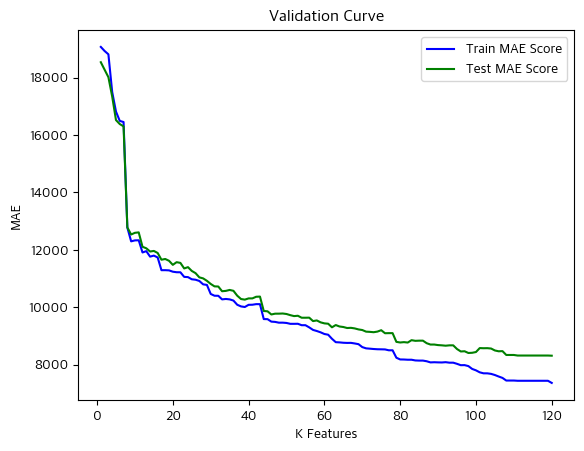

In [94]:
# target(Price)와 가장 correlated 된 features 를 k개 고르기

# 값을 저장할 빈 리스트 생성
train_MAE = []
test_MAE = []
k_selected_cols = []

# k_range : 1 ~ X 개수까지 범위 (X_train.columns length=122)
k_range = range(1, len(X_train.columns) + 1)

# 피처 개수 +1 만큼 반복
for k in k_range :

    # 현재 선택된 피처 개수
    print(f'{k} features')

    # SelectKBest 객체 생성 -> f_regression
    selector = SelectKBest(score_func=f_regression, k=k)

    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    # 선택된 피처들의 컬럼명 추출 후 k_selected_cols 리스트에 담기
    selected_cols = X_train.columns[selector.get_support()]
    k_selected_cols.append(selected_cols)
    print('Selected_columns:', selected_cols)

    # 선형 회귀 모델 학습
    model = LinearRegression()
    model.fit(X_train_selected, y_train)

    # 예측
    y_pred_train = model.predict(X_train_selected)
    y_pred_test = model.predict(X_test_selected)
    
    # 훈련 및 테스트 MAE 계산 후 train_MAE, test_MAE 리스트에 각각 저장
    train_MAE.append(mean_absolute_error(y_train, y_pred_train))
    test_MAE.append(mean_absolute_error(y_test, y_pred_test))
    
    r2_test = r2_score(y_test, y_pred_test)
    print(f'Test MAE: {test_MAE[-1]:,.0f}')
    print(f'Test R2: {r2_test:.4f}\n')

plt.plot(k_range, train_MAE, label='Train MAE Score', color='b')
plt.plot(k_range, test_MAE, label='Test MAE Score', color='g')
plt.ylabel('MAE')
plt.xlabel('K Features')
plt.title('Validation Curve')
plt.legend()
plt.show()

In [95]:
selected_col = k_selected_cols[50]
selected_col

Index(['세대수', '임대세대수', '최고층', '최저층', '최대공급면적', '최소공급면적', '총아파트동수', '세대평균_주차대수',
       '공급면적', '전용면적', '방수', '욕실수', '대형건설사', '지하철역_거리', '병원_2차', '병원_3차', '대학',
       '교육', '장례식장', '보건의료', '노선_경강선', '노선_3호선', '노선_수인선', '노선_김포골드라인',
       '노선_인천_1호선', '노선_의정부선', '노선_에버라인', '노선_2호선', '노선_1호선', '노선_9호선',
       '노선_인천국제공항선', '노선_7호선', '타입', '광역_경기', '광역_서울', '기초_경기_과천시',
       '기초_경기_김포시', '기초_경기_안성시', '기초_경기_양주시', '기초_경기_양평군', '기초_경기_용인시',
       '기초_경기_의정부시', '기초_경기_평택시', '기초_서울_강남구', '기초_서울_강동구', '기초_서울_광진구',
       '기초_서울_동대문구', '기초_서울_동작구', '기초_서울_서초구', '기초_인천_연수구', '기초_인천_중구'],
      dtype='object')

# **5. 모델 학습 및 평가 (모델링)**

**<회귀 평가지표>**
1. MAE(Mean Absolute Error)
    - 오차 절대값의 평균. 가장 직관적인 지표
    - 오차에 제곱을 시키기 때문에 절대값 1 이하의 작은 갑이나 아주 큰 값 등 이상치에 대해 민감
    - 상대적으로 이상치에 강건하여 변동성이 큰 지표와 작은 지표를 같이 예측할 시 유용

2. RMSE(Root Meat Squared Error)
    - 오차 제곱의 평균에 루트를 씌운 값 ->  MSE에 비해 오차에 덜 민감
    - 오차를 제곱한 값들을 이용했기 때문에, 큰 오차와 작은 오차에 다른 가중치가 반영되었다고 볼 수 있음

3. R2
    - RSS/TSS
    - RSS란, 잔차 제곱의 합
    - TSS란, 데이터의 평균 값과 실제 값의 차이 제곱의 합
    - 회귀 모델의 설명력을 표현하는 지표로, 1에 가까울수록 높은 성능

4. RMSLE (Root Mean Squared Log Error)
    - RMSE에 로그를 적용해준 지표

### **1) Linear Regression**

In [96]:
y = apt_data['공급액']
X = apt_data[selected_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

print('<LinearRegression 회귀분석>\n')

# 사용할 스케일러가 담긴 리스트
scalers = [StandardScaler(), MinMaxScaler()]

lr_result_data = []

# 각 스케일러를 순회하며 선형 회귀 모델 평가
for scaler in scalers:
    # print(f"({scaler.__class__.__name__})를 사용하여 학습 및 평가 중")

    # X 훈련, 검증 데이터 스케일러 적용
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # 스케일된 X로 선형 회귀 모델 학습
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    
    # 검증 데이터 예측
    lr_y_pred_val = lr_model.predict(X_val_scaled)
    
    # 모델 성능 평가 (MAE, RMSE, R2, RMSLE)
    lr_mae_val = mean_absolute_error(y_val, lr_y_pred_val)
    lr_rmse_val = np.sqrt(mean_squared_error(y_val, lr_y_pred_val))
    lr_r2_val = r2_score(y_val, lr_y_pred_val)
    lr_rmsle_val = np.sqrt(mean_squared_log_error(y_val, lr_y_pred_val))
    
    # X 테스트 스케일링 및 예측
    X_test_scaled = scaler.transform(X_test)
    lr_y_pred_test = lr_model.predict(X_test_scaled)
    
    # 테스트 데이터에서의 모델 성능 평가 (MAE, RMSE, R2, RMSLE)
    lr_mae_test = mean_absolute_error(y_test, lr_y_pred_test)
    lr_rmse_test = np.sqrt(mean_squared_error(y_test, lr_y_pred_test))
    lr_r2_test = r2_score(y_test, lr_y_pred_test)
    lr_rmsle_test = np.sqrt(mean_squared_log_error(y_test, lr_y_pred_test))
    
    # 결과 값을 리스트에 추가
    lr_result_data.append({
        'Scaler': scaler.__class__.__name__,
        'Validation MAE': lr_mae_val,
        'Validation RMSE': lr_rmse_val,
        'Validation R2': lr_r2_val,
        'Validation RMSLE': lr_rmsle_val,
        'Test MAE': lr_mae_test,
        'Test RMSE': lr_rmse_test,
        'Test R2': lr_r2_test,
        'Test RMSLE': lr_rmsle_test
    })

# 결과를 데이터프레임으로 변환
lr_result = pd.DataFrame(lr_result_data)
lr_result['Model'] = 'LinearRegression'

# 결과 출력
lr_result

<LinearRegression 회귀분석>



,Scaler,Validation MAE,Validation RMSE,Validation R2,Validation RMSLE,Test MAE,Test RMSE,Test R2,Test RMSLE,Model
0,StandardScaler,9501.449092,13858.426478,0.840927,0.209064,9716.847146,12821.891976,0.811629,0.234024,LinearRegression
1,MinMaxScaler,9501.449092,13858.426478,0.840927,0.209064,9716.847146,12821.891976,0.811629,0.234024,LinearRegression


### **2) LGBM Regressor**

In [97]:
y = apt_data['공급액']
X = apt_data[selected_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

print('<LGBMRegressor 회귀분석>\n')

lgbm_result_data = []

for scaler in scalers :
    # print(f"({scaler.__class__.__name__})를 사용하여 학습 및 평가 중")

    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # LightGBM 모델 설정 및 학습
    lgbm_model = LGBMRegressor(learning_rate=0.5, random_state=42)
    lgbm_model.fit(X_train_scaled, y_train)
    
    lgbm_y_pred_val = lgbm_model.predict(X_val_scaled)
    
    lgbm_mae_val = mean_absolute_error(y_val, lgbm_y_pred_val)
    lgbm_rmse_val = np.sqrt(mean_squared_error(y_val, lgbm_y_pred_val))
    lgbm_r2_val = r2_score(y_val, lgbm_y_pred_val)
    lgbm_rmsle_val = np.sqrt(mean_squared_log_error(y_val, lgbm_y_pred_val))
    
    # print(f"1. Validation MAE: {lgbm_mae_val:.4f}\n2. Validation RMSE: {lgbm_rmse_val:.4f}")
    
    X_test_scaled = scaler.transform(X_test)
    lgbm_y_pred_test = lgbm_model.predict(X_test_scaled)
    
    lgbm_mae_test = mean_absolute_error(y_test, lgbm_y_pred_test)
    lgbm_rmse_test = np.sqrt(mean_squared_error(y_test, lgbm_y_pred_test))
    lgbm_r2_test = r2_score(y_test, lgbm_y_pred_test)
    lgbm_rmsle_test = np.sqrt(mean_squared_log_error(y_test, lgbm_y_pred_test))
    
    # print(f"3. Test MAE: {lgbm_mae_test:.4f}\n4. Test RMSE: {lgbm_rmse_test:.4f}\n")

    lgbm_result_data.append({
        'Scaler': scaler.__class__.__name__,
        'Validation MAE': lgbm_mae_val,
        'Validation RMSE': lgbm_rmse_val,
        'Validation R2': lgbm_r2_val,
        'Validation RMSLE': lgbm_rmsle_val,
        'Test MAE': lgbm_mae_test,
        'Test RMSE': lgbm_rmse_test,
        'Test R2': lgbm_r2_test,
        'Test RMSLE': lgbm_rmsle_test
    })

# 결과를 데이터프레임으로 변환
lgbm_result = pd.DataFrame(lgbm_result_data)
lgbm_result['Model'] = 'LGBMRegressor'
lgbm_result

<LGBMRegressor 회귀분석>



,Scaler,Validation MAE,Validation RMSE,Validation R2,Validation RMSLE,Test MAE,Test RMSE,Test R2,Test RMSLE,Model
0,StandardScaler,3951.246513,7828.199244,0.949243,0.091619,4162.509157,9243.424399,0.902102,0.111459,LGBMRegressor
1,MinMaxScaler,4606.033382,9127.128320,0.931002,0.112773,4257.818072,8792.585011,0.911419,0.109590,LGBMRegressor


### **3) RandomForest Regressor**

In [98]:
y = apt_data['공급액']
X = apt_data[selected_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

print('<RandomForestRegressor 회귀분석>\n')

rf_result_data = []

for scaler in scalers:
    # print(f"({scaler.__class__.__name__})를 사용하여 학습 및 평가 중")

    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # RandomForest 모델 설정 및 학습
    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    
    rf_y_pred_val = rf_model.predict(X_val_scaled)
    
    rf_mae_val = mean_absolute_error(y_val, rf_y_pred_val)
    rf_rmse_val = np.sqrt(mean_squared_error(y_val, rf_y_pred_val))
    rf_r2_val = r2_score(y_val, rf_y_pred_val)
    rf_rmsle_val = np.sqrt(mean_squared_log_error(y_val, rf_y_pred_val))
    
    # print(f"1. Validation MAE: {rf_mae_val:.4f}\n2. Validation RMSE: {rf_rmse_val:.4f}")
    
    X_test_scaled = scaler.transform(X_test)
    rf_y_pred_test = rf_model.predict(X_test_scaled)
    
    rf_mae_test = mean_absolute_error(y_test, rf_y_pred_test)
    rf_rmse_test = np.sqrt(mean_squared_error(y_test, rf_y_pred_test))
    rf_r2_test = r2_score(y_test, rf_y_pred_test)
    rf_rmsle_test = np.sqrt(mean_squared_log_error(y_test, rf_y_pred_test))
    
    # print(f"3. Test MAE: {rf_mae_test:.4f}\n4. Test RMSE: {rf_rmse_test:.4f}\n")

    rf_result_data.append({
        'Scaler': scaler.__class__.__name__,
        'Validation MAE': rf_mae_val,
        'Validation RMSE': rf_rmse_val,
        'Validation R2': rf_r2_val,
        'Validation RMSLE': rf_rmsle_val,
        'Test MAE': rf_mae_test,
        'Test RMSE': rf_rmse_test,
        'Test R2': rf_r2_test,
        'Test RMSLE': rf_rmsle_test
    })

rf_result = pd.DataFrame(rf_result_data)
rf_result['Model'] = 'RandomForestRegressor'
rf_result

<RandomForestRegressor 회귀분석>



,Scaler,Validation MAE,Validation RMSE,Validation R2,Validation RMSLE,Test MAE,Test RMSE,Test R2,Test RMSLE,Model
0,StandardScaler,4569.108367,10872.834387,0.902084,0.103023,4516.506968,7649.112593,0.932960,0.108259,RandomForestRegressor
1,MinMaxScaler,4575.209339,10872.368628,0.902092,0.103182,4527.640045,7661.509554,0.932743,0.108483,RandomForestRegressor


### **4) CatBoost Regressor**

In [99]:
y = apt_data['공급액']
X = apt_data[selected_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

print('<CatBoostRegressor 회귀분석>\n')

catboost_result_data = []

for scaler in scalers:
    # print(f"({scaler.__class__.__name__})를 사용하여 학습 및 평가 중")

    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # CatBoostRegressor 모델 설정 및 학습
    catboost_model = CatBoostRegressor(random_state=42, verbose=0)
    catboost_model.fit(X_train_scaled, y_train)
    
    catboost_y_pred_val = catboost_model.predict(X_val_scaled)
    
    catboost_mae_val = mean_absolute_error(y_val, catboost_y_pred_val)
    catboost_rmse_val = np.sqrt(mean_squared_error(y_val, catboost_y_pred_val))
    catboost_r2_val = r2_score(y_val, catboost_y_pred_val)
    catboost_rmsle_val = np.sqrt(mean_squared_log_error(y_val, catboost_y_pred_val))
    
    # print(f"1. Validation MAE: {catboost_mae_val:.4f}\n2. Validation RMSE: {catboost_rmse_val:.4f}")
    
    X_test_scaled = scaler.transform(X_test)
    catboost_y_pred_test = catboost_model.predict(X_test_scaled)
    
    catboost_mae_test = mean_absolute_error(y_test, catboost_y_pred_test)
    catboost_rmse_test = np.sqrt(mean_squared_error(y_test, catboost_y_pred_test))
    catboost_r2_test = r2_score(y_test, catboost_y_pred_test)
    catboost_rmsle_test = np.sqrt(mean_squared_log_error(y_test, catboost_y_pred_test))
    
    # print(f"3. Test MAE: {catboost_mae_test:.4f}\n4. Test RMSE: {catboost_rmse_test:.4f}\n")

    catboost_result_data.append({
        'Scaler': scaler.__class__.__name__,
        'Validation MAE': catboost_mae_val,
        'Validation RMSE': catboost_rmse_val,
        'Validation R2': catboost_r2_val,
        'Validation RMSLE': catboost_rmsle_val,
        'Test MAE': catboost_mae_test,
        'Test RMSE': catboost_rmse_test,
        'Test R2': catboost_r2_test,
        'Test RMSLE': catboost_rmsle_test
    })

catboost_result = pd.DataFrame(catboost_result_data)
catboost_result['Model'] = 'CatBoostRegressor'
catboost_result

<CatBoostRegressor 회귀분석>



,Scaler,Validation MAE,Validation RMSE,Validation R2,Validation RMSLE,Test MAE,Test RMSE,Test R2,Test RMSLE,Model
0,StandardScaler,4089.883703,9571.806561,0.924115,0.090228,3609.839580,6081.653294,0.957621,0.089385,CatBoostRegressor
1,MinMaxScaler,4089.949100,9571.822090,0.924115,0.090229,3609.929157,6081.662251,0.957621,0.089386,CatBoostRegressor


### **5) XGBoost**

In [100]:
import xgboost as xgb

y = apt_data['공급액']
X = apt_data[selected_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

print('<XGBoost 회귀분석>\n')

xgb_result_data = []

for scaler in scalers:
    # print(f"({scaler.__class__.__name__})를 사용하여 학습 및 평가 중")

    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # XGBoost 모델 설정 및 학습
    xgb_model = xgb.XGBRegressor(random_state=42)
    xgb_model.fit(X_train_scaled, y_train)
    
    xgb_y_pred_val = xgb_model.predict(X_val_scaled)
    
    xgb_mae_val = mean_absolute_error(y_val, xgb_y_pred_val)
    xgb_rmse_val = np.sqrt(mean_squared_error(y_val, xgb_y_pred_val))
    xgb_r2_val = r2_score(y_val, xgb_y_pred_val)
    xgb_rmsle_val = np.sqrt(mean_squared_log_error(y_val, xgb_y_pred_val))
    
    # print(f"1. Validation MAE: {xgb_mae_val:.4f}\n2. Validation RMSE: {xgb_rmse_val:.4f}")
    
    X_test_scaled = scaler.transform(X_test)
    xgb_y_pred_test = xgb_model.predict(X_test_scaled)
    
    xgb_mae_test = mean_absolute_error(y_test, xgb_y_pred_test)
    xgb_rmse_test = np.sqrt(mean_squared_error(y_test, xgb_y_pred_test))
    xgb_r2_test = r2_score(y_test, xgb_y_pred_test)
    xgb_rmsle_test = np.sqrt(mean_squared_log_error(y_test, xgb_y_pred_test))
    
    # print(f"3. Test MAE: {xgb_mae_test:.4f}\n4. Test RMSE: {xgb_rmse_test:.4f}\n")

    xgb_result_data.append({
        'Scaler': scaler.__class__.__name__,
        'Validation MAE': xgb_mae_val,
        'Validation RMSE': xgb_rmse_val,
        'Validation R2': xgb_r2_val,
        'Validation RMSLE': xgb_rmsle_val,
        'Test MAE': xgb_mae_test,
        'Test RMSE': xgb_rmse_test,
        'Test R2': xgb_r2_test,
        'Test RMSLE': xgb_rmsle_test
    })


xgb_result = pd.DataFrame(xgb_result_data)
xgb_result['Model'] = 'XGBoostRegressor'
xgb_result

<XGBoost 회귀분석>



,Scaler,Validation MAE,Validation RMSE,Validation R2,Validation RMSLE,Test MAE,Test RMSE,Test R2,Test RMSLE,Model
0,StandardScaler,3721.466665,9018.413438,0.932636,0.085877,3488.736002,6393.991209,0.953156,0.088474,XGBoostRegressor
1,MinMaxScaler,3721.466665,9018.413438,0.932636,0.085877,3488.243346,6393.824362,0.953158,0.088473,XGBoostRegressor


In [101]:
# 모든 결과 데이터프레임을 하나로 합치기
result_dataframes = [lr_result, lgbm_result, rf_result, catboost_result, xgb_result]
all_results = pd.concat(result_dataframes, axis=0)

# 결과 데이터프레임을 순위 순으로 정렬
all_results_sorted = all_results.sort_values(by='Test RMSE')

# 순위 컬럼 추가
all_results_sorted['Rank'] = range(1, len(all_results_sorted) + 1)

# 순위 컬럼을 맨 앞으로 위치시키기
column_order = ['Rank', 'Model'] + [col for col in all_results_sorted if col != 'Rank' and col != 'Model']
all_results_sorted = all_results_sorted[column_order]

all_results_sorted

,Rank,Model,Scaler,Validation MAE,Validation RMSE,Validation R2,Validation RMSLE,Test MAE,Test RMSE,Test R2,Test RMSLE
0,1,CatBoostRegressor,StandardScaler,4089.883703,9571.806561,0.924115,0.090228,3609.839580,6081.653294,0.957621,0.089385
1,2,CatBoostRegressor,MinMaxScaler,4089.949100,9571.822090,0.924115,0.090229,3609.929157,6081.662251,0.957621,0.089386
1,3,XGBoostRegressor,MinMaxScaler,3721.466665,9018.413438,0.932636,0.085877,3488.243346,6393.824362,0.953158,0.088473
0,4,XGBoostRegressor,StandardScaler,3721.466665,9018.413438,0.932636,0.085877,3488.736002,6393.991209,0.953156,0.088474
0,5,RandomForestRegressor,StandardScaler,4569.108367,10872.834387,0.902084,0.103023,4516.506968,7649.112593,0.932960,0.108259
1,6,RandomForestRegressor,MinMaxScaler,4575.209339,10872.368628,0.902092,0.103182,4527.640045,7661.509554,0.932743,0.108483
1,7,LGBMRegressor,MinMaxScaler,4606.033382,9127.128320,0.931002,0.112773,4257.818072,8792.585011,0.911419,0.109590
0,8,LGBMRegressor,StandardScaler,3951.246513,7828.199244,0.949243,0.091619,4162.509157,9243.424399,0.902102,0.111459
0,9,LinearRegression,StandardScaler,9501.449092,13858.426478,0.840927,0.209064,9716.847146,12821.891976,0.811629,0.234024
1,10,LinearRegression,MinMaxScaler,9501.449092,13858.426478,0.840927,0.209064,9716.847146,12821.891976,0.811629,0.234024


# **6. 리모델링**
- 알고리즘 교체, 파라미터 조정, 테크닉- 스태킹 등

### **1) Linear Regression**

In [102]:
y = apt_data['공급액']
X = apt_data[selected_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

scalers = [StandardScaler(), MinMaxScaler()]

lr_result_data = []

for scaler in scalers:
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lr_param_grid = {
        'fit_intercept': [True, False],
        'positive': [True, False]
    }

    lr_grid = GridSearchCV(LinearRegression(), param_grid=lr_param_grid, scoring='neg_mean_squared_error', cv=3)
    lr_grid.fit(X_train_scaled, y_train)

    best_lr_model = lr_grid.best_estimator_
    best_lr_params = lr_grid.best_params_
    
    lr_y_pred_val = best_lr_model.predict(X_val_scaled)
    
    lr_mae_val = mean_absolute_error(y_val, lr_y_pred_val)
    lr_rmse_val = np.sqrt(mean_squared_error(y_val, lr_y_pred_val))
    lr_r2_val = r2_score(y_val, lr_y_pred_val)
    lr_rmsle_val = np.sqrt(mean_squared_log_error(y_val, lr_y_pred_val))
    
    X_test_scaled = scaler.transform(X_test)
    lr_y_pred_test = best_lr_model.predict(X_test_scaled)
    
    lr_mae_test = mean_absolute_error(y_test, lr_y_pred_test)
    lr_rmse_test = np.sqrt(mean_squared_error(y_test, lr_y_pred_test))
    lr_r2_test = r2_score(y_test, lr_y_pred_test)
    lr_rmsle_test = np.sqrt(mean_squared_log_error(y_test, lr_y_pred_test))
    
    lr_result_data.append({
        'Scaler': scaler.__class__.__name__,
        'Best Parameters': best_lr_params,
        'Validation MAE': lr_mae_val,
        'Validation RMSE': lr_rmse_val,
        'Validation R2': lr_r2_val,
        'Validation RMSLE': lr_rmsle_val,
        'Test MAE': lr_mae_test,
        'Test RMSE': lr_rmse_test,
        'Test R2': lr_r2_test,
        'Test RMSLE': lr_rmsle_test
    })

lr_result = pd.DataFrame(lr_result_data)
lr_result['Model'] = 'LinearRegression'
lr_result

,Scaler,Best Parameters,Validation MAE,Validation RMSE,Validation R2,Validation RMSLE,Test MAE,Test RMSE,Test R2,Test RMSLE,Model
0,StandardScaler,"{'fit_intercept': True, 'positive': False}",9501.449092,13858.426478,0.840927,0.209064,9716.847146,12821.891976,0.811629,0.234024,LinearRegression
1,MinMaxScaler,"{'fit_intercept': True, 'positive': False}",9501.449092,13858.426478,0.840927,0.209064,9716.847146,12821.891976,0.811629,0.234024,LinearRegression


In [103]:
best_lr_params

{'fit_intercept': True, 'positive': False}

### **2) LGBM Regressor**

In [104]:
y = apt_data['공급액']
X = apt_data[selected_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

scalers = [StandardScaler(), MinMaxScaler()]

lgbm_result_data = []

for scaler in scalers :
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lgbm_param_grid = {
        'learning_rate': [0.001, 0.01, 0.1, 0.5],
        'n_estimators': [50, 100, 200, 300, 500],
        'max_depth': [3, 5, 7]
    }

    lgbm_grid = GridSearchCV(LGBMRegressor(random_state=42), param_grid=lgbm_param_grid, scoring='neg_mean_squared_error', cv=3)
    lgbm_grid.fit(X_train_scaled, y_train, eval_set=[(X_val_scaled, y_val)], early_stopping_rounds=20, verbose=False)

    best_lgbm_model = lgbm_grid.best_estimator_
    best_lgbm_params = lgbm_grid.best_params_
    
    lgbm_y_pred_val = best_lgbm_model.predict(X_val_scaled)
    
    lgbm_mae_val = mean_absolute_error(y_val, lgbm_y_pred_val)
    lgbm_rmse_val = np.sqrt(mean_squared_error(y_val, lgbm_y_pred_val))
    lgbm_r2_val = r2_score(y_val, lgbm_y_pred_val)
    lgbm_rmsle_val = np.sqrt(mean_squared_log_error(y_val, lgbm_y_pred_val))
    
    X_test_scaled = scaler.transform(X_test)
    lgbm_y_pred_test = best_lgbm_model.predict(X_test_scaled)
    
    lgbm_mae_test = mean_absolute_error(y_test, lgbm_y_pred_test)
    lgbm_rmse_test = np.sqrt(mean_squared_error(y_test, lgbm_y_pred_test))
    lgbm_r2_test = r2_score(y_test, lgbm_y_pred_test)
    lgbm_rmsle_test = np.sqrt(mean_squared_log_error(y_test, lgbm_y_pred_test))
    
    lgbm_result_data.append({
        'Scaler': scaler.__class__.__name__,
        'Best Parameters': best_lgbm_params,
        'Validation MAE': lgbm_mae_val,
        'Validation RMSE': lgbm_rmse_val,
        'Validation R2': lgbm_r2_val,
        'Validation RMSLE': lgbm_rmsle_val,
        'Test MAE': lgbm_mae_test,
        'Test RMSE': lgbm_rmse_test,
        'Test R2': lgbm_r2_test,
        'Test RMSLE': lgbm_rmsle_test
    })

lgbm_result = pd.DataFrame(lgbm_result_data)
lgbm_result['Model'] = 'LGBMRegressor'
lgbm_result

,Scaler,Best Parameters,Validation MAE,Validation RMSE,Validation R2,Validation RMSLE,Test MAE,Test RMSE,Test R2,Test RMSLE,Model
0,StandardScaler,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",4046.252772,8033.128638,0.946551,0.089306,4302.530635,8087.605388,0.925054,0.102185,LGBMRegressor
1,MinMaxScaler,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",4092.690545,7997.976992,0.947018,0.095066,4343.382734,7959.124274,0.927416,0.102871,LGBMRegressor


In [105]:
best_lgbm_params

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}

### **3) RandomForest Regressor**

In [106]:
y = apt_data['공급액']
X = apt_data[selected_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

scalers = [StandardScaler(), MinMaxScaler()]

rf_result_data = []

for scaler in scalers:
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    rf_param_grid = {
        'n_estimators': [50, 100, 200, 500],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    rf_model = RandomForestRegressor(random_state=42)

    rf_grid = GridSearchCV(rf_model, param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=3)
    
    # Early Stopping을 위한 변수 -> 랜덤포레스트에는 Early Stopping이 없음.
    best_rmse = np.inf
    no_improvement_count = 0
    early_stopping_rounds = 20

    for n_estimators in rf_param_grid['n_estimators']:
        rf_model.set_params(n_estimators=n_estimators)
        rf_model.fit(X_train_scaled, y_train)
        
        rf_y_pred_val = rf_model.predict(X_val_scaled)
        rf_rmse_val = np.sqrt(mean_squared_error(y_val, rf_y_pred_val))
        
        # 성능 향상이 없을 때 카운트 증가
        if rf_rmse_val < best_rmse :
            best_rmse = rf_rmse_val
            no_improvement_count = 0
        else:
            no_improvement_count += 1
            
        # 일정 횟수 이상 성능 향상이 없을 때 학습 조기 중단
        if no_improvement_count >= early_stopping_rounds :
            break
    
    best_rf_params = {'n_estimators': n_estimators}
    
    rf_y_pred_val = rf_model.predict(X_val_scaled)

    rf_mae_val = mean_absolute_error(y_val, rf_y_pred_val)
    rf_rmse_val = np.sqrt(mean_squared_error(y_val, rf_y_pred_val))
    rf_r2_val = r2_score(y_val, rf_y_pred_val)
    rf_rmsle_val = np.sqrt(mean_squared_log_error(y_val, rf_y_pred_val))

    X_test_scaled = scaler.transform(X_test)
    rf_y_pred_test = rf_model.predict(X_test_scaled)

    rf_mae_test = mean_absolute_error(y_test, rf_y_pred_test)
    rf_rmse_test = np.sqrt(mean_squared_error(y_test, rf_y_pred_test))
    rf_r2_test = r2_score(y_test, rf_y_pred_test)
    rf_rmsle_test = np.sqrt(mean_squared_log_error(y_test, rf_y_pred_test))

    rf_result_data.append({
        'Scaler': scaler.__class__.__name__,
        'Best Parameters': best_rf_params,
        'Validation MAE': rf_mae_val,
        'Validation RMSE': rf_rmse_val,
        'Validation R2': rf_r2_val,
        'Validation RMSLE': rf_rmsle_val,
        'Test MAE': rf_mae_test,
        'Test RMSE': rf_rmse_test,
        'Test R2': rf_r2_test,
        'Test RMSLE': rf_rmsle_test
    })

rf_result = pd.DataFrame(rf_result_data)
rf_result['Model'] = 'RandomForestRegressor'
rf_result = rf_result.sort_values(by='Test RMSE')

rf_result

,Scaler,Best Parameters,Validation MAE,Validation RMSE,Validation R2,Validation RMSLE,Test MAE,Test RMSE,Test R2,Test RMSLE,Model
1,MinMaxScaler,{'n_estimators': 500},4604.423585,10676.562632,0.905587,0.102139,4603.951331,7856.152129,0.929282,0.108527,RandomForestRegressor
0,StandardScaler,{'n_estimators': 500},4602.683703,10678.421602,0.905554,0.102020,4604.625160,7858.388200,0.929242,0.108479,RandomForestRegressor


In [107]:
best_rf_params

{'n_estimators': 500}

### **4) CatBoost Regressor**

In [108]:
from sklearn.metrics import mean_squared_log_error

y = apt_data['공급액']
X = apt_data[selected_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


scalers = [StandardScaler(), MinMaxScaler()]

catboost_result_data = []

for scaler in scalers:
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    catboost_param_grid = {
        'learning_rate': [0.01, 0.1, 0.5],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7]
    }

    catboost_grid = GridSearchCV(CatBoostRegressor(random_state=42, verbose=0), param_grid=catboost_param_grid, scoring='neg_mean_absolute_error', cv=3)
    catboost_grid.fit(X_train_scaled, y_train)

    best_catboost_model = catboost_grid.best_estimator_
    best_catboost_params = catboost_grid.best_params_
    
    catboost_y_pred_val = best_catboost_model.predict(X_val_scaled)
    
    catboost_mae_val = mean_absolute_error(y_val, catboost_y_pred_val)
    catboost_rmse_val = np.sqrt(mean_squared_error(y_val, catboost_y_pred_val))
    catboost_r2_val = r2_score(y_val, catboost_y_pred_val)
    catboost_rmsle_val = np.sqrt(mean_squared_log_error(y_val, catboost_y_pred_val))
    
    X_test_scaled = scaler.transform(X_test)
    catboost_y_pred_test = best_catboost_model.predict(X_test_scaled)
    
    catboost_mae_test = mean_absolute_error(y_test, catboost_y_pred_test)
    catboost_rmse_test = np.sqrt(mean_squared_error(y_test, catboost_y_pred_test))
    catboost_r2_test = r2_score(y_test, catboost_y_pred_test)
    catboost_rmsle_test = np.sqrt(mean_squared_log_error(y_test, catboost_y_pred_test))
    
    catboost_result_data.append({
        'Scaler': scaler.__class__.__name__,
        'Best Parameters': best_catboost_params,
        'Validation MAE': catboost_mae_val,
        'Validation RMSE': catboost_rmse_val,
        'Validation R2': catboost_r2_val,
        'Validation RMSLE': catboost_rmsle_val,
        'Test MAE': catboost_mae_test,
        'Test RMSE': catboost_rmse_test,
        'Test R2': catboost_r2_test,
        'Test RMSLE': catboost_rmsle_test
    })

catboost_result = pd.DataFrame(catboost_result_data)
catboost_result['Model'] = 'CatBoostRegressor'
catboost_result

,Scaler,Best Parameters,Validation MAE,Validation RMSE,Validation R2,Validation RMSLE,Test MAE,Test RMSE,Test R2,Test RMSLE,Model
0,StandardScaler,"{'learning_rate': 0.5, 'max_depth': 5, 'n_esti...",3852.828735,8300.084781,0.942940,0.107710,3380.202989,5899.787260,0.960118,0.095519,CatBoostRegressor
1,MinMaxScaler,"{'learning_rate': 0.5, 'max_depth': 5, 'n_esti...",3850.448526,8296.108512,0.942994,0.107497,3379.303367,5898.675319,0.960133,0.095465,CatBoostRegressor


In [109]:
best_catboost_params

{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}

### **5) XGBoost**

In [110]:
y = apt_data['공급액']
X = apt_data[selected_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

scalers = [StandardScaler(), MinMaxScaler()]

xgb_result_data = []

for scaler in scalers:
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    xgb_param_grid = {
        'learning_rate': [0.001, 0.01, 0.1, 0.5],
        'n_estimators': [50, 100, 200, 300, 500],
        'max_depth': [1, 3, 5, 7]
    }

    xgb_grid = GridSearchCV(xgb.XGBRegressor(random_state=42, early_stopping_rounds=10), param_grid=xgb_param_grid, scoring='neg_mean_absolute_error', cv=3)
    xgb_grid.fit(X_train_scaled, y_train, eval_set=[(X_val_scaled, y_val)], verbose=False)

    best_xgb_model = xgb_grid.best_estimator_
    best_xgb_params = xgb_grid.best_params_
    
    xgb_y_pred_val = best_xgb_model.predict(X_val_scaled)
    
    xgb_mae_val = mean_absolute_error(y_val, xgb_y_pred_val)
    xgb_rmse_val = np.sqrt(mean_squared_error(y_val, xgb_y_pred_val))
    xgb_r2_val = r2_score(y_val, xgb_y_pred_val)
    xgb_rmsle_val = np.sqrt(mean_squared_log_error(y_val, xgb_y_pred_val))
    
    X_test_scaled = scaler.transform(X_test)
    xgb_y_pred_test = best_xgb_model.predict(X_test_scaled)
    
    xgb_mae_test = mean_absolute_error(y_test, xgb_y_pred_test)
    xgb_rmse_test = np.sqrt(mean_squared_error(y_test, xgb_y_pred_test))
    xgb_r2_test = r2_score(y_test, xgb_y_pred_test)
    xgb_rmsle_test = np.sqrt(mean_squared_log_error(y_test, xgb_y_pred_test))
    
    xgb_result_data.append({
        'Scaler': scaler.__class__.__name__,
        'Best Parameters': best_xgb_params,
        'Validation MAE': xgb_mae_val,
        'Validation RMSE': xgb_rmse_val,
        'Validation R2': xgb_r2_val,
        'Validation RMSLE': xgb_rmsle_val,
        'Test MAE': xgb_mae_test,
        'Test RMSE': xgb_rmse_test,
        'Test R2': xgb_r2_test,
        'Test RMSLE': xgb_rmsle_test
    })

xgb_result = pd.DataFrame(xgb_result_data)
xgb_result['Model'] = 'XGBoostRegressor'
xgb_result

,Scaler,Best Parameters,Validation MAE,Validation RMSE,Validation R2,Validation RMSLE,Test MAE,Test RMSE,Test R2,Test RMSLE,Model
0,StandardScaler,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",3754.361606,8713.112015,0.93712,0.087069,3558.533701,6125.889802,0.957002,0.084359,XGBoostRegressor
1,MinMaxScaler,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",3742.999367,8700.583706,0.93730,0.086699,3544.898793,6103.786307,0.957312,0.083782,XGBoostRegressor


In [111]:
best_xgb_params

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}

# **7. 최종평가**
- 베스트 파라미터 적용 후
- Test RMSE 를 기준으로 sort

In [112]:
# 각 모델 결과 데이터프레임을 리스트에 추가
all_results = [lr_result, lgbm_result, rf_result, catboost_result, xgb_result]

# 모델명과 순위를 기준으로 데이터프레임을 합치고 정렬
total_results = pd.concat(all_results).reset_index(drop=True)
total_results['Rank'] = total_results.groupby('Model')['Test RMSE'].rank(ascending=True)
total_results = total_results.sort_values(['Test RMSE'], ascending=[True])  

# 컬럼 순서 조정
columns_order = ['Rank', 'Model', 'Best Parameters', 'Scaler',
                 'Validation MAE', 'Validation RMSE', 'Validation R2', 'Validation RMSLE',
                 'Test MAE', 'Test RMSE', 'Test R2', 'Test RMSLE']

total_results = total_results[columns_order]
total_results

,Rank,Model,Best Parameters,Scaler,Validation MAE,Validation RMSE,Validation R2,Validation RMSLE,Test MAE,Test RMSE,Test R2,Test RMSLE
7,1.0,CatBoostRegressor,"{'learning_rate': 0.5, 'max_depth': 5, 'n_esti...",MinMaxScaler,3850.448526,8296.108512,0.942994,0.107497,3379.303367,5898.675319,0.960133,0.095465
6,2.0,CatBoostRegressor,"{'learning_rate': 0.5, 'max_depth': 5, 'n_esti...",StandardScaler,3852.828735,8300.084781,0.942940,0.107710,3380.202989,5899.787260,0.960118,0.095519
9,1.0,XGBoostRegressor,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",MinMaxScaler,3742.999367,8700.583706,0.937300,0.086699,3544.898793,6103.786307,0.957312,0.083782
8,2.0,XGBoostRegressor,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",StandardScaler,3754.361606,8713.112015,0.937120,0.087069,3558.533701,6125.889802,0.957002,0.084359
4,1.0,RandomForestRegressor,{'n_estimators': 500},MinMaxScaler,4604.423585,10676.562632,0.905587,0.102139,4603.951331,7856.152129,0.929282,0.108527
5,2.0,RandomForestRegressor,{'n_estimators': 500},StandardScaler,4602.683703,10678.421602,0.905554,0.102020,4604.625160,7858.388200,0.929242,0.108479
3,1.0,LGBMRegressor,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",MinMaxScaler,4092.690545,7997.976992,0.947018,0.095066,4343.382734,7959.124274,0.927416,0.102871
2,2.0,LGBMRegressor,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",StandardScaler,4046.252772,8033.128638,0.946551,0.089306,4302.530635,8087.605388,0.925054,0.102185
0,1.0,LinearRegression,"{'fit_intercept': True, 'positive': False}",StandardScaler,9501.449092,13858.426478,0.840927,0.209064,9716.847146,12821.891976,0.811629,0.234024
1,2.0,LinearRegression,"{'fit_intercept': True, 'positive': False}",MinMaxScaler,9501.449092,13858.426478,0.840927,0.209064,9716.847146,12821.891976,0.811629,0.234024
